In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("max_rows", 2000)
import warnings
warnings.

In [2]:
df = pd.read_csv("Train.csv").drop("MRG", axis=1)
test = pd.read_csv("Test.csv").drop("MRG", axis=1)
sub = pd.read_csv("sample_submission.csv")
var_def = pd.read_csv("VariableDefinitions.csv")

In [3]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,50,NaN,NaN,0


In [4]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,61,All-net 500F=2000F;5d,65.0


Validation Strategy is Leave stratfied 10% out

In [17]:
df.shape, test.shape

((400000, 18), (100000, 17))

In [10]:
var_def.head(20)

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [3]:
df["MISSING_COL"] = df.T.isnull().sum()
test["MISSING_COL"] = test.T.isnull().sum()

In [18]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,MISSING_COL
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000,400000.000000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711,6.669735
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000,4.973970
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000,3.000000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000,4.000000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000,13.000000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000,14.000000


In [13]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000.000000,58297.000000
mean,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,28.122430,9.276035
std,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,22.324101,12.369808
min,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,24.000000,5.000000
75%,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,51.000000,12.000000
max,201500.000000,120.000000,181135.000000,60378.000000,91.000000,474262.000000,24887.000000,5695.000000,3083.000000,1366.000000,1017.000000,62.000000,390.000000


In [96]:
print(not_in[0] + " is present in the test but not in the train")

Postpaid FORFAIT 10H Package is present in the test but not in the train


In [23]:
df.describe(include="O")

,user_id,REGION,TENURE,TOP_PACK
count,399956,242443,399956,232627
unique,399956,14,8,91
top,b140e2253b399b27951e9ecc79ec75d02f533a98,DAKAR,K > 24 month,All-net 500F=2000F;5d
freq,1,95506,379398,58675


In [24]:
test.describe(include="O")

,user_id,REGION,TENURE,TOP_PACK
count,100000,60707,100000,58297
unique,100000,14,8,92
top,9a5ee8fb92256933e509aa37e2f6a2a0c2a75ae8,DAKAR,K > 24 month,All-net 500F=2000F;5d
freq,1,23998,94825,14916


In [4]:
##TURN TENURE TO NUMERIC LATER
tenure = {"K":2, "H":1.375, "G":1.125, "J":1.875, "I":1.625, "E":0.625, "F":0.875, "D":0.375}
df["TENURE"] = df["TENURE"].str.split(expand=True)[0]
test["TENURE"] = test["TENURE"].str.split(expand=True)[0]

In [98]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,MISSING_COL
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,62,All-net 500F=2000F;5d,35.0,0,3
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,40,"Data: 100 F=40MB,24H",22.0,0,2
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,32,All-net 500F=2000F;5d,3.0,0,4
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,18,On net 200F=Unlimited _call24H,3.0,0,2
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,50,NaN,NaN,0,7


In [5]:
df.loc[df['MISSING_COL'] == 14, "TOTAL_MISSING"] = "Yes"
df.loc[df['MISSING_COL'] != 14, "TOTAL_MISSING"] = "No"

test.loc[test['MISSING_COL'] == 14, "TOTAL_MISSING"] = "Yes"
test.loc[test['MISSING_COL'] != 14, "TOTAL_MISSING"] = "No"

In [6]:
df['TENURE_REG'] = df.groupby(by=["TENURE"])[['REGULARITY']].transform(lambda x: np.mean(x))
test['TENURE_REG'] = test.groupby(by=["TENURE"])[['REGULARITY']].transform(lambda x: np.mean(x))

In [7]:
data = pd.concat([df, test])

In [107]:
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,MISSING_COL,TOTAL_MISSING
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,62,All-net 500F=2000F;5d,35.0,0.0,3,No
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,40,"Data: 100 F=40MB,24H",22.0,0.0,2,No
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,32,All-net 500F=2000F;5d,3.0,0.0,4,No
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,18,On net 200F=Unlimited _call24H,3.0,0.0,2,No
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,50,NaN,NaN,0.0,7,No


In [70]:
inactive = []

for i in data["REGULARITY"]:
    if i < 30:
        inactive.append("Yes")
    else:
        inactive.append("No")
data["INACTIVE"] = inactive

In [71]:
data["TENURE"] = data["TENURE"].map(tenure)
data["AVERAGE"] = data["MONTANT"] / data["FREQUENCE_RECH"]

In [288]:
data.describe()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,AVERAGE
count,499956.000000,324730.000000,324730.000000,331803.000000,331803.000000,331803.000000,253785.000000,317759.000000,292446.000000,200806.000000,39360.000000,31932.000000,499956.000000,290924.000000,399956.000000,324730.000000
mean,1.970935,5526.971312,11.511964,5507.803416,1835.939823,13.956839,3367.217578,276.593258,95.404940,23.200293,7.968953,7.275304,28.060707,9.258171,0.187131,557.472218
std,0.143400,7102.276582,13.274312,7175.237128,2391.741029,14.674066,11950.453254,873.034276,204.177509,63.858154,36.707298,28.063409,22.291084,12.317203,0.390017,711.216343
min,0.375000,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000
25%,2.000000,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.000000,307.142857
50%,2.000000,3000.000000,7.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.000000,500.000000
75%,2.000000,7300.000000,16.000000,7350.000000,2450.000000,19.000000,2924.000000,156.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.000000,550.000000
max,2.000000,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,3083.000000,1657.000000,1017.000000,62.000000,629.000000,1.000000,100000.000000


In [10]:
def Outlier(data, col_name):
    return 1.5*(data[col_name].quantile(.75) - data[col_name].quantile(.25)) + data[col_name].quantile(.85) 

In [11]:
def Clip_feat(data, col):
    data[col] = np.clip(data[col], a_min=None, a_max=Outlier(data, col))
    data[col] = data[col].fillna(data[col].median())
    return data[col]                             

In [12]:
data["MONTANT"] = np.clip(data["MONTANT"], a_min=None, a_max=Outlier(data, "MONTANT"))
data["MONTANT"] = data["MONTANT"].fillna(data["MONTANT"].median())

data["FREQUENCE_RECH"] = np.clip(data["FREQUENCE_RECH"], a_min=None, a_max=Outlier(data, "FREQUENCE_RECH"))
data["FREQUENCE_RECH"] = data["FREQUENCE_RECH"].fillna(data["FREQUENCE_RECH"].median())

In [111]:
data.corr()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,MISSING_COL,AVERAGE
TENURE,1.000000,0.016181,0.006569,0.010904,0.010904,0.001480,-0.027164,0.002413,0.017994,0.008648,-0.000121,-0.013682,0.029890,0.005220,-0.041359,-0.029899,-0.001488
MONTANT,0.016181,1.000000,0.849859,0.905261,0.905260,0.819899,0.312736,0.361460,0.586601,0.365754,0.213590,0.248633,0.566111,0.718967,-0.164808,-0.339160,0.221160
FREQUENCE_RECH,0.006569,0.849859,1.000000,0.775590,0.775589,0.940994,0.178698,0.393929,0.475887,0.310535,0.126696,0.142192,0.537230,0.824303,-0.155010,-0.309222,-0.102118
REVENUE,0.010904,0.905261,0.775590,1.000000,1.000000,0.791578,0.317678,0.331456,0.667084,0.420638,0.360319,0.389193,0.534462,0.751423,-0.114822,-0.399165,0.207028
ARPU_SEGMENT,0.010904,0.905260,0.775589,1.000000,1.000000,0.791578,0.317678,0.331457,0.667085,0.420638,0.360320,0.389193,0.534460,0.751423,-0.114822,-0.399165,0.207028
FREQUENCE,0.001480,0.819899,0.940994,0.791578,0.791578,1.000000,0.187049,0.394034,0.475780,0.311196,0.110125,0.163836,0.591663,0.842945,-0.139685,-0.433006,-0.053689
DATA_VOLUME,-0.027164,0.312736,0.178698,0.317678,0.317678,0.187049,1.000000,-0.015579,0.066210,0.029061,0.038179,0.056729,0.203656,0.131806,-0.036015,-0.111462,0.362499
ON_NET,0.002413,0.361460,0.393929,0.331456,0.331457,0.394034,-0.015579,1.000000,0.218964,0.136284,0.008651,-0.014127,0.269070,0.351843,-0.057701,-0.141899,0.026206
ORANGE,0.017994,0.586601,0.475887,0.667084,0.667085,0.475780,0.066210,0.218964,1.000000,0.410551,0.039866,0.020344,0.310979,0.555222,-0.063382,-0.208394,0.182515
TIGO,0.008648,0.365754,0.310535,0.420638,0.420638,0.311196,0.029061,0.136284,0.410551,1.000000,0.004385,0.014754,0.196294,0.372265,-0.035890,-0.087924,0.085355


In [13]:
data.drop("ARPU_SEGMENT", axis=1, inplace=True)

In [14]:
data["REVENUE"] = Clip_feat(data, "REVENUE")
data["FREQUENCE"] = Clip_feat(data, "FREQUENCE")
data["DATA_VOLUME"] = Clip_feat(data, "DATA_VOLUME")
data["ON_NET"] = Clip_feat(data, "ON_NET")
data["ORANGE"] = Clip_feat(data, "ORANGE")
data["TIGO"] = Clip_feat(data, "TIGO")
data["FREQ_TOP_PACK"] = Clip_feat(data, "FREQ_TOP_PACK")

data["AVERAGE"] = Clip_feat(data, "AVERAGE")

In [15]:
data.index = data["user_id"]
data.drop(["user_id", "ZONE1", "ZONE2"], axis=1, inplace=True)

In [296]:
data.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TRNURE,INACTIVE,AVERAGE
user_id,,,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,2.0,17000.0,32.0,18000.0,34.0,267.0,97.0,312.0,6.0,62,All-net 500F=2000F;5d,33.0,0.0,K,No,531.250000
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,2.0,4300.0,29.0,4427.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0.0,K,No,148.275862
ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,2.0,1500.0,3.0,1500.0,3.0,267.0,30.0,30.0,6.0,32,All-net 500F=2000F;5d,3.0,0.0,K,No,500.000000
f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,2.0,1500.0,3.0,2497.0,4.0,0.0,159.0,45.0,19.0,18,On net 200F=Unlimited _call24H,3.0,0.0,K,No,500.000000
ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,2.0,3000.0,7.0,498.0,3.0,1.0,1.0,3.0,6.0,50,NaN,5.0,0.0,K,No,500.000000


In [16]:
data = pd.get_dummies(data)
data.shape

(500000, 145)

In [267]:
data.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month",TOP_PACK_Yewouleen_PKG,INACTIVE_No,INACTIVE_Yes
user_id,,,,,,,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,2.0,17000.0,32.0,18000.0,34.0,267.0,97.0,312.0,6.0,62,...,0,0,0,0,0,0,0,0,1,0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,2.0,4300.0,29.0,4427.0,37.0,1764.0,8.0,3.0,0.0,40,...,0,0,0,0,0,0,0,0,1,0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,2.0,1500.0,3.0,1500.0,3.0,267.0,30.0,30.0,6.0,32,...,0,0,0,0,0,0,0,0,1,0
f467cdb6669818373c26c2bad44e01ba66f97d21,2.0,1500.0,3.0,2497.0,4.0,0.0,159.0,45.0,19.0,18,...,0,0,0,0,0,0,0,0,1,0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,2.0,NaN,NaN,498.0,3.0,1.0,1.0,3.0,6.0,50,...,0,0,0,0,0,0,0,0,1,0


In [17]:
X = data[data["CHURN"].notnull()].drop("CHURN", axis=1)
y = data[data["CHURN"].notnull()].CHURN

K = data[data["CHURN"].isnull()].drop("CHURN", axis=1)

In [18]:
X.shape, y.shape, K.shape

((400000, 144), (400000,), (100000, 144))

In [19]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X = scale.fit_transform(X)
K = scale.transform(K)

In [125]:
from sklearn.model_selection import train_test_split, KFold


X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42, test_size=.1)

In [126]:
X_train.shape, X_test.shape

((360000, 144), (40000, 144))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [190]:
knn.score(X_train, y_train)

0.8747077796252078

In [191]:
knn.score(X_test, y_test)

0.8605735573557356

In [26]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [200]:
table["LogReg"] = clf.predict_proba(X_test)[:,1]

In [27]:
clf.score(X_train, y_train)

0.87490625

In [28]:
clf.score(X_test, y_test)

0.8738

In [62]:
log_loss(y_test, bag_predictions_scaled[:,0]*.99 + clf.predict_proba(X_test)[:,1]*.01)

0.25306240997210566

In [124]:
from sklearn.metrics import confusion_matrix
print(clf.score(X_train, y_train))
con = confusion_matrix(y_train, clf.predict(X_train))
con

0.875953125


array([[237155,  22970],
       [ 16725,  43150]], dtype=int64)

In [195]:
print(clf.score(X_test, y_test))
con = confusion_matrix(y_test, clf.predict(X_test))
con

0.875075


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [129]:
print(f"Logloss train: {log_loss(y_train, clf.predict_proba(X_train))}, test: {log_loss(y_test, clf.predict_proba(X_test))}")

Logloss train: 0.2616445351066545, test: 0.2627436287442677


In [218]:
con = confusion_matrix(y_test, clf.predict(X_test))
con

array([[58775,  6248],
       [ 3904, 11065]], dtype=int64)

In [226]:
pred1 = knn.predict_proba(X_test)[:,1]
pred1

array([0.2, 0.2, 0. , ..., 0.4, 0.4, 0. ])

In [50]:
pred = clf.predict_proba(X_test)[:,1]
pred

array([6.43227832e-04, 6.80442091e-01, 6.31005194e-01, ...,
       1.19895665e-02, 1.79008983e-01, 5.31938765e-03])

In [24]:
from sklearn.metrics import log_loss

In [29]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(df["CHURN"],  hmm)

0.7091575

In [30]:
submission = test[["user_id"]]

In [31]:
import lightgbm
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [127]:
bags = 15
seed = 0
bag_predictions_scaled = np.zeros((X_test.shape[0],2))
bag_test_scaled = np.zeros((K.shape[0], 2))

for i in range(bags):
    print(f"Iteration Number {i+1}")
    cat  = CatBoostClassifier(n_estimators=5000, eval_metric='Logloss', learning_rate=0.1, use_best_model=True, random_state=seed + i*42 )
    cat.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose=True)
    predictions = cat.predict_proba(X_test)[:,1]
    bag_predictions_scaled[:,0]+= predictions
    bag_test_scaled[:,0]+= cat.predict_proba(K)[:,1]
    print(f"Logloss for Cat {round(log_loss(y_test, cat.predict_proba(X_test)[:,1]), 6)}")
    
    reg  = LGBMClassifier(learning_rate=0.1, n_estimators=5000, n_jobs=-1, random_state=seed + i*42)
    reg.fit(X_train,y_train, eval_metric='logloss', eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    
    predictions = reg.predict_proba(X_test)[:,1]
    bag_predictions_scaled[:,1]+= predictions
    bag_test_scaled[:,1]+= reg.predict_proba(K)[:,1]
    print(f"Logloss for light {round(log_loss(y_test, reg.predict_proba(X_test)[:,1]), 6)}")
    
    print()
    print()
bag_predictions_scaled/= bags
bag_test_scaled/= bags
print(log_loss(y_test, bag_predictions_scaled[:,0]))
print(log_loss(y_test, bag_predictions_scaled[:,1]))

Iteration Number 1
0:	learn: 0.5876204	test: 0.5876204	test1: 0.5876236	best: 0.5876236 (0)	total: 1.08s	remaining: 1h 30m 24s
1:	learn: 0.5109942	test: 0.5109942	test1: 0.5109331	best: 0.5109331 (1)	total: 1.37s	remaining: 57m 5s
2:	learn: 0.4478332	test: 0.4478332	test1: 0.4480803	best: 0.4480803 (2)	total: 1.7s	remaining: 47m 15s
3:	learn: 0.4036597	test: 0.4036597	test1: 0.4039513	best: 0.4039513 (3)	total: 2.19s	remaining: 45m 37s
4:	learn: 0.3695852	test: 0.3695852	test1: 0.3699543	best: 0.3699543 (4)	total: 2.66s	remaining: 44m 15s
5:	learn: 0.3449992	test: 0.3449992	test1: 0.3453721	best: 0.3453721 (5)	total: 2.8s	remaining: 38m 53s
6:	learn: 0.3323786	test: 0.3323786	test1: 0.3327464	best: 0.3327464 (6)	total: 3.1s	remaining: 36m 52s
7:	learn: 0.3179142	test: 0.3179142	test1: 0.3181931	best: 0.3181931 (7)	total: 3.23s	remaining: 33m 38s
8:	learn: 0.3096127	test: 0.3096127	test1: 0.3098543	best: 0.3098543 (8)	total: 3.49s	remaining: 32m 13s
9:	learn: 0.3029517	test: 0.3029517	t

78:	learn: 0.2547340	test: 0.2547340	test1: 0.2559335	best: 0.2559335 (78)	total: 15.4s	remaining: 15m 56s
79:	learn: 0.2546991	test: 0.2546991	test1: 0.2559076	best: 0.2559076 (79)	total: 15.5s	remaining: 15m 51s
80:	learn: 0.2546493	test: 0.2546493	test1: 0.2558829	best: 0.2558829 (80)	total: 15.6s	remaining: 15m 48s
81:	learn: 0.2545670	test: 0.2545670	test1: 0.2558304	best: 0.2558304 (81)	total: 15.8s	remaining: 15m 44s
82:	learn: 0.2545138	test: 0.2545138	test1: 0.2557816	best: 0.2557816 (82)	total: 15.9s	remaining: 15m 43s
83:	learn: 0.2544629	test: 0.2544629	test1: 0.2557539	best: 0.2557539 (83)	total: 16.1s	remaining: 15m 39s
84:	learn: 0.2544256	test: 0.2544256	test1: 0.2557304	best: 0.2557304 (84)	total: 16.2s	remaining: 15m 36s
85:	learn: 0.2543724	test: 0.2543724	test1: 0.2556965	best: 0.2556965 (85)	total: 16.3s	remaining: 15m 32s
86:	learn: 0.2543236	test: 0.2543236	test1: 0.2556621	best: 0.2556621 (86)	total: 16.5s	remaining: 15m 30s
87:	learn: 0.2542363	test: 0.2542363	

154:	learn: 0.2519326	test: 0.2519326	test1: 0.2541184	best: 0.2541184 (154)	total: 26s	remaining: 13m 34s
155:	learn: 0.2519006	test: 0.2519006	test1: 0.2541234	best: 0.2541184 (154)	total: 26.2s	remaining: 13m 32s
156:	learn: 0.2518831	test: 0.2518831	test1: 0.2541259	best: 0.2541184 (154)	total: 26.3s	remaining: 13m 32s
157:	learn: 0.2518578	test: 0.2518578	test1: 0.2541020	best: 0.2541020 (157)	total: 26.5s	remaining: 13m 30s
158:	learn: 0.2518431	test: 0.2518431	test1: 0.2541070	best: 0.2541020 (157)	total: 26.6s	remaining: 13m 30s
159:	learn: 0.2518248	test: 0.2518248	test1: 0.2541058	best: 0.2541020 (157)	total: 26.7s	remaining: 13m 29s
160:	learn: 0.2518001	test: 0.2518001	test1: 0.2541050	best: 0.2541020 (157)	total: 26.9s	remaining: 13m 28s
161:	learn: 0.2517692	test: 0.2517692	test1: 0.2541050	best: 0.2541020 (157)	total: 27s	remaining: 13m 26s
162:	learn: 0.2517440	test: 0.2517440	test1: 0.2540965	best: 0.2540965 (162)	total: 27.2s	remaining: 13m 26s
163:	learn: 0.2517181	t

230:	learn: 0.2504801	test: 0.2504801	test1: 0.2537347	best: 0.2537319 (229)	total: 36.7s	remaining: 12m 37s
231:	learn: 0.2504685	test: 0.2504685	test1: 0.2537239	best: 0.2537239 (231)	total: 36.8s	remaining: 12m 37s
232:	learn: 0.2504550	test: 0.2504550	test1: 0.2537146	best: 0.2537146 (232)	total: 37s	remaining: 12m 36s
233:	learn: 0.2504418	test: 0.2504418	test1: 0.2537161	best: 0.2537146 (232)	total: 37.1s	remaining: 12m 35s
234:	learn: 0.2504393	test: 0.2504393	test1: 0.2537163	best: 0.2537146 (232)	total: 37.2s	remaining: 12m 35s
235:	learn: 0.2504252	test: 0.2504252	test1: 0.2537104	best: 0.2537104 (235)	total: 37.4s	remaining: 12m 34s
236:	learn: 0.2504130	test: 0.2504130	test1: 0.2537171	best: 0.2537104 (235)	total: 37.5s	remaining: 12m 33s
237:	learn: 0.2503970	test: 0.2503970	test1: 0.2537188	best: 0.2537104 (235)	total: 37.6s	remaining: 12m 33s
238:	learn: 0.2503861	test: 0.2503861	test1: 0.2537109	best: 0.2537104 (235)	total: 37.8s	remaining: 12m 32s
239:	learn: 0.2503661

306:	learn: 0.2495125	test: 0.2495125	test1: 0.2536658	best: 0.2536473 (299)	total: 47.6s	remaining: 12m 8s
307:	learn: 0.2495091	test: 0.2495091	test1: 0.2536642	best: 0.2536473 (299)	total: 47.8s	remaining: 12m 7s
308:	learn: 0.2494973	test: 0.2494973	test1: 0.2536604	best: 0.2536473 (299)	total: 47.9s	remaining: 12m 7s
309:	learn: 0.2494861	test: 0.2494861	test1: 0.2536598	best: 0.2536473 (299)	total: 48.1s	remaining: 12m 7s
310:	learn: 0.2494749	test: 0.2494749	test1: 0.2536612	best: 0.2536473 (299)	total: 48.2s	remaining: 12m 7s
311:	learn: 0.2494621	test: 0.2494621	test1: 0.2536512	best: 0.2536473 (299)	total: 48.4s	remaining: 12m 6s
312:	learn: 0.2494498	test: 0.2494498	test1: 0.2536478	best: 0.2536473 (299)	total: 48.5s	remaining: 12m 6s
313:	learn: 0.2494335	test: 0.2494335	test1: 0.2536391	best: 0.2536391 (313)	total: 48.6s	remaining: 12m 5s
314:	learn: 0.2494176	test: 0.2494176	test1: 0.2536376	best: 0.2536376 (314)	total: 48.8s	remaining: 12m 5s
315:	learn: 0.2494070	test: 

382:	learn: 0.2486949	test: 0.2486949	test1: 0.2535709	best: 0.2535636 (375)	total: 58.2s	remaining: 11m 42s
383:	learn: 0.2486866	test: 0.2486866	test1: 0.2535685	best: 0.2535636 (375)	total: 58.4s	remaining: 11m 41s
384:	learn: 0.2486775	test: 0.2486775	test1: 0.2535595	best: 0.2535595 (384)	total: 58.5s	remaining: 11m 41s
385:	learn: 0.2486633	test: 0.2486633	test1: 0.2535519	best: 0.2535519 (385)	total: 58.7s	remaining: 11m 41s
386:	learn: 0.2486507	test: 0.2486507	test1: 0.2535530	best: 0.2535519 (385)	total: 58.8s	remaining: 11m 41s
387:	learn: 0.2486457	test: 0.2486457	test1: 0.2535547	best: 0.2535519 (385)	total: 58.9s	remaining: 11m 40s
388:	learn: 0.2486298	test: 0.2486298	test1: 0.2535565	best: 0.2535519 (385)	total: 59.1s	remaining: 11m 40s
389:	learn: 0.2486225	test: 0.2486225	test1: 0.2535530	best: 0.2535519 (385)	total: 59.2s	remaining: 11m 40s
390:	learn: 0.2486170	test: 0.2486170	test1: 0.2535585	best: 0.2535519 (385)	total: 59.4s	remaining: 11m 39s
391:	learn: 0.24860

458:	learn: 0.2479546	test: 0.2479546	test1: 0.2535560	best: 0.2535392 (456)	total: 1m 8s	remaining: 11m 20s
459:	learn: 0.2479431	test: 0.2479431	test1: 0.2535581	best: 0.2535392 (456)	total: 1m 8s	remaining: 11m 19s
460:	learn: 0.2479337	test: 0.2479337	test1: 0.2535589	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 19s
461:	learn: 0.2479270	test: 0.2479270	test1: 0.2535633	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 19s
462:	learn: 0.2479136	test: 0.2479136	test1: 0.2535522	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 19s
463:	learn: 0.2478988	test: 0.2478988	test1: 0.2535511	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 18s
464:	learn: 0.2478896	test: 0.2478896	test1: 0.2535473	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 18s
465:	learn: 0.2478780	test: 0.2478780	test1: 0.2535483	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 18s
466:	learn: 0.2478648	test: 0.2478648	test1: 0.2535552	best: 0.2535392 (456)	total: 1m 9s	remaining: 11m 18s
467:	learn: 0.24785

534:	learn: 0.2472625	test: 0.2472625	test1: 0.2536239	best: 0.2535392 (456)	total: 1m 19s	remaining: 11m
535:	learn: 0.2472613	test: 0.2472613	test1: 0.2536260	best: 0.2535392 (456)	total: 1m 19s	remaining: 11m
536:	learn: 0.2472537	test: 0.2472537	test1: 0.2536270	best: 0.2535392 (456)	total: 1m 19s	remaining: 11m
537:	learn: 0.2472432	test: 0.2472432	test1: 0.2536315	best: 0.2535392 (456)	total: 1m 19s	remaining: 10m 59s
538:	learn: 0.2472345	test: 0.2472345	test1: 0.2536290	best: 0.2535392 (456)	total: 1m 19s	remaining: 10m 59s
539:	learn: 0.2472269	test: 0.2472269	test1: 0.2536264	best: 0.2535392 (456)	total: 1m 19s	remaining: 10m 59s
540:	learn: 0.2472213	test: 0.2472213	test1: 0.2536228	best: 0.2535392 (456)	total: 1m 19s	remaining: 10m 59s
541:	learn: 0.2472188	test: 0.2472188	test1: 0.2536223	best: 0.2535392 (456)	total: 1m 20s	remaining: 10m 58s
542:	learn: 0.2472056	test: 0.2472056	test1: 0.2536195	best: 0.2535392 (456)	total: 1m 20s	remaining: 10m 58s
543:	learn: 0.2471966	

53:	learn: 0.2573367	test: 0.2573367	test1: 0.2583503	best: 0.2583503 (53)	total: 7.6s	remaining: 11m 36s
54:	learn: 0.2571573	test: 0.2571573	test1: 0.2581808	best: 0.2581808 (54)	total: 7.74s	remaining: 11m 35s
55:	learn: 0.2570391	test: 0.2570391	test1: 0.2580810	best: 0.2580810 (55)	total: 7.88s	remaining: 11m 35s
56:	learn: 0.2568813	test: 0.2568813	test1: 0.2579281	best: 0.2579281 (56)	total: 8.01s	remaining: 11m 34s
57:	learn: 0.2567527	test: 0.2567527	test1: 0.2578107	best: 0.2578107 (57)	total: 8.14s	remaining: 11m 33s
58:	learn: 0.2566096	test: 0.2566096	test1: 0.2577061	best: 0.2577061 (58)	total: 8.28s	remaining: 11m 33s
59:	learn: 0.2565100	test: 0.2565100	test1: 0.2576212	best: 0.2576212 (59)	total: 8.42s	remaining: 11m 33s
60:	learn: 0.2563930	test: 0.2563930	test1: 0.2574986	best: 0.2574986 (60)	total: 8.55s	remaining: 11m 32s
61:	learn: 0.2562211	test: 0.2562211	test1: 0.2573291	best: 0.2573291 (61)	total: 8.7s	remaining: 11m 32s
62:	learn: 0.2560557	test: 0.2560557	te

131:	learn: 0.2525540	test: 0.2525540	test1: 0.2544897	best: 0.2544897 (131)	total: 18.8s	remaining: 11m 34s
132:	learn: 0.2525213	test: 0.2525213	test1: 0.2544905	best: 0.2544897 (131)	total: 19s	remaining: 11m 33s
133:	learn: 0.2524764	test: 0.2524764	test1: 0.2544439	best: 0.2544439 (133)	total: 19.1s	remaining: 11m 33s
134:	learn: 0.2524421	test: 0.2524421	test1: 0.2544097	best: 0.2544097 (134)	total: 19.2s	remaining: 11m 33s
135:	learn: 0.2524051	test: 0.2524051	test1: 0.2543879	best: 0.2543879 (135)	total: 19.4s	remaining: 11m 33s
136:	learn: 0.2523758	test: 0.2523758	test1: 0.2543802	best: 0.2543802 (136)	total: 19.5s	remaining: 11m 32s
137:	learn: 0.2523502	test: 0.2523502	test1: 0.2543836	best: 0.2543802 (136)	total: 19.7s	remaining: 11m 32s
138:	learn: 0.2523245	test: 0.2523245	test1: 0.2543710	best: 0.2543710 (138)	total: 19.8s	remaining: 11m 32s
139:	learn: 0.2522961	test: 0.2522961	test1: 0.2543515	best: 0.2543515 (139)	total: 20s	remaining: 11m 32s
140:	learn: 0.2522656	t

207:	learn: 0.2509663	test: 0.2509663	test1: 0.2538991	best: 0.2538991 (207)	total: 29.3s	remaining: 11m 15s
208:	learn: 0.2509499	test: 0.2509499	test1: 0.2538839	best: 0.2538839 (208)	total: 29.5s	remaining: 11m 15s
209:	learn: 0.2509362	test: 0.2509362	test1: 0.2538889	best: 0.2538839 (208)	total: 29.6s	remaining: 11m 15s
210:	learn: 0.2509311	test: 0.2509311	test1: 0.2538861	best: 0.2538839 (208)	total: 29.7s	remaining: 11m 14s
211:	learn: 0.2509154	test: 0.2509154	test1: 0.2538886	best: 0.2538839 (208)	total: 29.9s	remaining: 11m 14s
212:	learn: 0.2508896	test: 0.2508896	test1: 0.2538819	best: 0.2538819 (212)	total: 30s	remaining: 11m 14s
213:	learn: 0.2508743	test: 0.2508743	test1: 0.2538818	best: 0.2538818 (213)	total: 30.1s	remaining: 11m 14s
214:	learn: 0.2508472	test: 0.2508472	test1: 0.2538764	best: 0.2538764 (214)	total: 30.3s	remaining: 11m 14s
215:	learn: 0.2508321	test: 0.2508321	test1: 0.2538746	best: 0.2538746 (215)	total: 30.4s	remaining: 11m 13s
216:	learn: 0.2508144

283:	learn: 0.2499412	test: 0.2499412	test1: 0.2537083	best: 0.2536887 (280)	total: 39.7s	remaining: 10m 59s
284:	learn: 0.2499412	test: 0.2499412	test1: 0.2537083	best: 0.2536887 (280)	total: 39.8s	remaining: 10m 58s
285:	learn: 0.2499412	test: 0.2499412	test1: 0.2537083	best: 0.2536887 (280)	total: 39.9s	remaining: 10m 57s
286:	learn: 0.2499398	test: 0.2499398	test1: 0.2537074	best: 0.2536887 (280)	total: 40s	remaining: 10m 57s
287:	learn: 0.2499253	test: 0.2499253	test1: 0.2537284	best: 0.2536887 (280)	total: 40.2s	remaining: 10m 57s
288:	learn: 0.2499046	test: 0.2499046	test1: 0.2537266	best: 0.2536887 (280)	total: 40.3s	remaining: 10m 57s
289:	learn: 0.2498904	test: 0.2498904	test1: 0.2537290	best: 0.2536887 (280)	total: 40.5s	remaining: 10m 57s
290:	learn: 0.2498683	test: 0.2498683	test1: 0.2537314	best: 0.2536887 (280)	total: 40.6s	remaining: 10m 57s
291:	learn: 0.2498532	test: 0.2498532	test1: 0.2537392	best: 0.2536887 (280)	total: 40.7s	remaining: 10m 56s
292:	learn: 0.2498386

359:	learn: 0.2491058	test: 0.2491058	test1: 0.2536288	best: 0.2536172 (352)	total: 50s	remaining: 10m 45s
360:	learn: 0.2490963	test: 0.2490963	test1: 0.2536303	best: 0.2536172 (352)	total: 50.2s	remaining: 10m 44s
361:	learn: 0.2490940	test: 0.2490940	test1: 0.2536314	best: 0.2536172 (352)	total: 50.3s	remaining: 10m 44s
362:	learn: 0.2490774	test: 0.2490774	test1: 0.2536279	best: 0.2536172 (352)	total: 50.5s	remaining: 10m 44s
363:	learn: 0.2490602	test: 0.2490602	test1: 0.2536202	best: 0.2536172 (352)	total: 50.6s	remaining: 10m 44s
364:	learn: 0.2490493	test: 0.2490493	test1: 0.2536274	best: 0.2536172 (352)	total: 50.7s	remaining: 10m 44s
365:	learn: 0.2490400	test: 0.2490400	test1: 0.2536316	best: 0.2536172 (352)	total: 50.9s	remaining: 10m 44s
366:	learn: 0.2490230	test: 0.2490230	test1: 0.2536354	best: 0.2536172 (352)	total: 51s	remaining: 10m 43s
367:	learn: 0.2490111	test: 0.2490111	test1: 0.2536373	best: 0.2536172 (352)	total: 51.1s	remaining: 10m 43s
368:	learn: 0.2489988	t

435:	learn: 0.2483555	test: 0.2483555	test1: 0.2536220	best: 0.2536132 (380)	total: 1m	remaining: 10m 32s
436:	learn: 0.2483458	test: 0.2483458	test1: 0.2536262	best: 0.2536132 (380)	total: 1m	remaining: 10m 31s
437:	learn: 0.2483412	test: 0.2483412	test1: 0.2536257	best: 0.2536132 (380)	total: 1m	remaining: 10m 31s
438:	learn: 0.2483247	test: 0.2483247	test1: 0.2536165	best: 0.2536132 (380)	total: 1m	remaining: 10m 31s
439:	learn: 0.2483122	test: 0.2483122	test1: 0.2536076	best: 0.2536076 (439)	total: 1m	remaining: 10m 31s
440:	learn: 0.2483019	test: 0.2483019	test1: 0.2536097	best: 0.2536076 (439)	total: 1m 1s	remaining: 10m 31s
441:	learn: 0.2482979	test: 0.2482979	test1: 0.2536123	best: 0.2536076 (439)	total: 1m 1s	remaining: 10m 31s
442:	learn: 0.2482800	test: 0.2482800	test1: 0.2536097	best: 0.2536076 (439)	total: 1m 1s	remaining: 10m 30s
443:	learn: 0.2482696	test: 0.2482696	test1: 0.2536203	best: 0.2536076 (439)	total: 1m 1s	remaining: 10m 30s
444:	learn: 0.2482674	test: 0.2482

511:	learn: 0.2476800	test: 0.2476800	test1: 0.2535889	best: 0.2535889 (511)	total: 1m 10s	remaining: 10m 20s
512:	learn: 0.2476686	test: 0.2476686	test1: 0.2535846	best: 0.2535846 (512)	total: 1m 10s	remaining: 10m 20s
513:	learn: 0.2476577	test: 0.2476577	test1: 0.2535868	best: 0.2535846 (512)	total: 1m 11s	remaining: 10m 20s
514:	learn: 0.2476488	test: 0.2476488	test1: 0.2535844	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 20s
515:	learn: 0.2476390	test: 0.2476390	test1: 0.2535998	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 19s
516:	learn: 0.2476289	test: 0.2476289	test1: 0.2535949	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 19s
517:	learn: 0.2476163	test: 0.2476163	test1: 0.2535937	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 19s
518:	learn: 0.2476110	test: 0.2476110	test1: 0.2535953	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 19s
519:	learn: 0.2476065	test: 0.2476065	test1: 0.2535942	best: 0.2535844 (514)	total: 1m 11s	remaining: 10m 19s
520:	learn

587:	learn: 0.2470427	test: 0.2470427	test1: 0.2535989	best: 0.2535635 (533)	total: 1m 21s	remaining: 10m 10s
588:	learn: 0.2470342	test: 0.2470342	test1: 0.2535911	best: 0.2535635 (533)	total: 1m 21s	remaining: 10m 10s
589:	learn: 0.2470268	test: 0.2470268	test1: 0.2535895	best: 0.2535635 (533)	total: 1m 21s	remaining: 10m 10s
590:	learn: 0.2470188	test: 0.2470188	test1: 0.2535806	best: 0.2535635 (533)	total: 1m 21s	remaining: 10m 10s
591:	learn: 0.2470100	test: 0.2470100	test1: 0.2535842	best: 0.2535635 (533)	total: 1m 21s	remaining: 10m 10s
592:	learn: 0.2470010	test: 0.2470010	test1: 0.2535904	best: 0.2535635 (533)	total: 1m 22s	remaining: 10m 10s
593:	learn: 0.2469911	test: 0.2469911	test1: 0.2535905	best: 0.2535635 (533)	total: 1m 22s	remaining: 10m 10s
594:	learn: 0.2469845	test: 0.2469845	test1: 0.2535918	best: 0.2535635 (533)	total: 1m 22s	remaining: 10m 9s
595:	learn: 0.2469706	test: 0.2469706	test1: 0.2535935	best: 0.2535635 (533)	total: 1m 22s	remaining: 10m 9s
596:	learn: 

663:	learn: 0.2464326	test: 0.2464326	test1: 0.2535292	best: 0.2535193 (633)	total: 1m 31s	remaining: 10m
664:	learn: 0.2464326	test: 0.2464326	test1: 0.2535292	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
665:	learn: 0.2464231	test: 0.2464231	test1: 0.2535354	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
666:	learn: 0.2464162	test: 0.2464162	test1: 0.2535330	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
667:	learn: 0.2464054	test: 0.2464054	test1: 0.2535326	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
668:	learn: 0.2464053	test: 0.2464053	test1: 0.2535326	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
669:	learn: 0.2464031	test: 0.2464031	test1: 0.2535310	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 59s
670:	learn: 0.2463971	test: 0.2463971	test1: 0.2535296	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 58s
671:	learn: 0.2463934	test: 0.2463934	test1: 0.2535251	best: 0.2535193 (633)	total: 1m 32s	remaining: 9m 58s
672:	learn: 0.2463881	

740:	learn: 0.2457876	test: 0.2457876	test1: 0.2535817	best: 0.2535170 (675)	total: 1m 42s	remaining: 9m 48s
741:	learn: 0.2457873	test: 0.2457873	test1: 0.2535821	best: 0.2535170 (675)	total: 1m 42s	remaining: 9m 48s
742:	learn: 0.2457793	test: 0.2457793	test1: 0.2535763	best: 0.2535170 (675)	total: 1m 42s	remaining: 9m 48s
743:	learn: 0.2457708	test: 0.2457708	test1: 0.2535776	best: 0.2535170 (675)	total: 1m 42s	remaining: 9m 48s
744:	learn: 0.2457636	test: 0.2457636	test1: 0.2535869	best: 0.2535170 (675)	total: 1m 42s	remaining: 9m 48s
745:	learn: 0.2457536	test: 0.2457536	test1: 0.2535854	best: 0.2535170 (675)	total: 1m 43s	remaining: 9m 47s
746:	learn: 0.2457415	test: 0.2457415	test1: 0.2535851	best: 0.2535170 (675)	total: 1m 43s	remaining: 9m 47s
747:	learn: 0.2457360	test: 0.2457360	test1: 0.2535787	best: 0.2535170 (675)	total: 1m 43s	remaining: 9m 47s
748:	learn: 0.2457231	test: 0.2457231	test1: 0.2535719	best: 0.2535170 (675)	total: 1m 43s	remaining: 9m 47s
749:	learn: 0.24570

40:	learn: 0.2599098	test: 0.2599098	test1: 0.2607148	best: 0.2607148 (40)	total: 5.75s	remaining: 11m 35s
41:	learn: 0.2596743	test: 0.2596743	test1: 0.2604991	best: 0.2604991 (41)	total: 5.89s	remaining: 11m 34s
42:	learn: 0.2594243	test: 0.2594243	test1: 0.2602651	best: 0.2602651 (42)	total: 6.04s	remaining: 11m 35s
43:	learn: 0.2590999	test: 0.2590999	test1: 0.2599459	best: 0.2599459 (43)	total: 6.17s	remaining: 11m 34s
44:	learn: 0.2589387	test: 0.2589387	test1: 0.2597828	best: 0.2597828 (44)	total: 6.32s	remaining: 11m 35s
45:	learn: 0.2587050	test: 0.2587050	test1: 0.2595613	best: 0.2595613 (45)	total: 6.45s	remaining: 11m 34s
46:	learn: 0.2584005	test: 0.2584005	test1: 0.2592692	best: 0.2592692 (46)	total: 6.6s	remaining: 11m 35s
47:	learn: 0.2582457	test: 0.2582457	test1: 0.2591363	best: 0.2591363 (47)	total: 6.73s	remaining: 11m 34s
48:	learn: 0.2580059	test: 0.2580059	test1: 0.2589198	best: 0.2589198 (48)	total: 6.88s	remaining: 11m 34s
49:	learn: 0.2578336	test: 0.2578336	t

118:	learn: 0.2530270	test: 0.2530270	test1: 0.2548336	best: 0.2548336 (118)	total: 16.6s	remaining: 11m 20s
119:	learn: 0.2529913	test: 0.2529913	test1: 0.2548099	best: 0.2548099 (119)	total: 16.7s	remaining: 11m 20s
120:	learn: 0.2529573	test: 0.2529573	test1: 0.2547791	best: 0.2547791 (120)	total: 16.9s	remaining: 11m 20s
121:	learn: 0.2529110	test: 0.2529110	test1: 0.2547350	best: 0.2547350 (121)	total: 17s	remaining: 11m 20s
122:	learn: 0.2528958	test: 0.2528958	test1: 0.2547306	best: 0.2547306 (122)	total: 17.2s	remaining: 11m 20s
123:	learn: 0.2528717	test: 0.2528717	test1: 0.2547197	best: 0.2547197 (123)	total: 17.3s	remaining: 11m 20s
124:	learn: 0.2528401	test: 0.2528401	test1: 0.2547067	best: 0.2547067 (124)	total: 17.4s	remaining: 11m 20s
125:	learn: 0.2527880	test: 0.2527880	test1: 0.2546554	best: 0.2546554 (125)	total: 17.6s	remaining: 11m 20s
126:	learn: 0.2527617	test: 0.2527617	test1: 0.2546365	best: 0.2546365 (126)	total: 17.7s	remaining: 11m 20s
127:	learn: 0.2527284

194:	learn: 0.2511381	test: 0.2511381	test1: 0.2540541	best: 0.2540508 (193)	total: 27.2s	remaining: 11m 10s
195:	learn: 0.2511316	test: 0.2511316	test1: 0.2540527	best: 0.2540508 (193)	total: 27.3s	remaining: 11m 9s
196:	learn: 0.2511157	test: 0.2511157	test1: 0.2540507	best: 0.2540507 (196)	total: 27.5s	remaining: 11m 9s
197:	learn: 0.2510943	test: 0.2510943	test1: 0.2540527	best: 0.2540507 (196)	total: 27.6s	remaining: 11m 9s
198:	learn: 0.2510679	test: 0.2510679	test1: 0.2540455	best: 0.2540455 (198)	total: 27.8s	remaining: 11m 9s
199:	learn: 0.2510521	test: 0.2510521	test1: 0.2540367	best: 0.2540367 (199)	total: 27.9s	remaining: 11m 9s
200:	learn: 0.2510408	test: 0.2510408	test1: 0.2540350	best: 0.2540350 (200)	total: 28s	remaining: 11m 9s
201:	learn: 0.2510253	test: 0.2510253	test1: 0.2540382	best: 0.2540350 (200)	total: 28.2s	remaining: 11m 8s
202:	learn: 0.2510087	test: 0.2510087	test1: 0.2540474	best: 0.2540350 (200)	total: 28.3s	remaining: 11m 8s
203:	learn: 0.2509905	test: 0

272:	learn: 0.2500811	test: 0.2500811	test1: 0.2538971	best: 0.2538971 (272)	total: 38.3s	remaining: 11m 3s
273:	learn: 0.2500637	test: 0.2500637	test1: 0.2538936	best: 0.2538936 (273)	total: 38.4s	remaining: 11m 3s
274:	learn: 0.2500584	test: 0.2500584	test1: 0.2538933	best: 0.2538933 (274)	total: 38.6s	remaining: 11m 3s
275:	learn: 0.2500459	test: 0.2500459	test1: 0.2538875	best: 0.2538875 (275)	total: 38.7s	remaining: 11m 2s
276:	learn: 0.2500377	test: 0.2500377	test1: 0.2538790	best: 0.2538790 (276)	total: 38.9s	remaining: 11m 2s
277:	learn: 0.2500307	test: 0.2500307	test1: 0.2538836	best: 0.2538790 (276)	total: 39s	remaining: 11m 2s
278:	learn: 0.2500211	test: 0.2500211	test1: 0.2538849	best: 0.2538790 (276)	total: 39.1s	remaining: 11m 2s
279:	learn: 0.2500011	test: 0.2500011	test1: 0.2538988	best: 0.2538790 (276)	total: 39.3s	remaining: 11m 2s
280:	learn: 0.2499839	test: 0.2499839	test1: 0.2538998	best: 0.2538790 (276)	total: 39.4s	remaining: 11m 2s
281:	learn: 0.2499759	test: 0.

348:	learn: 0.2491904	test: 0.2491904	test1: 0.2537660	best: 0.2537568 (329)	total: 48.8s	remaining: 10m 49s
349:	learn: 0.2491820	test: 0.2491820	test1: 0.2537738	best: 0.2537568 (329)	total: 48.9s	remaining: 10m 49s
350:	learn: 0.2491709	test: 0.2491709	test1: 0.2537699	best: 0.2537568 (329)	total: 49s	remaining: 10m 49s
351:	learn: 0.2491570	test: 0.2491570	test1: 0.2537798	best: 0.2537568 (329)	total: 49.2s	remaining: 10m 49s
352:	learn: 0.2491570	test: 0.2491570	test1: 0.2537799	best: 0.2537568 (329)	total: 49.3s	remaining: 10m 48s
353:	learn: 0.2491570	test: 0.2491570	test1: 0.2537799	best: 0.2537568 (329)	total: 49.4s	remaining: 10m 48s
354:	learn: 0.2491570	test: 0.2491570	test1: 0.2537799	best: 0.2537568 (329)	total: 49.5s	remaining: 10m 47s
355:	learn: 0.2491570	test: 0.2491570	test1: 0.2537799	best: 0.2537568 (329)	total: 49.6s	remaining: 10m 46s
356:	learn: 0.2491570	test: 0.2491570	test1: 0.2537799	best: 0.2537568 (329)	total: 49.7s	remaining: 10m 46s
357:	learn: 0.2491489

425:	learn: 0.2484531	test: 0.2484531	test1: 0.2537516	best: 0.2537362 (380)	total: 59.2s	remaining: 10m 35s
426:	learn: 0.2484447	test: 0.2484447	test1: 0.2537532	best: 0.2537362 (380)	total: 59.3s	remaining: 10m 35s
427:	learn: 0.2484444	test: 0.2484444	test1: 0.2537533	best: 0.2537362 (380)	total: 59.5s	remaining: 10m 35s
428:	learn: 0.2484432	test: 0.2484432	test1: 0.2537519	best: 0.2537362 (380)	total: 59.6s	remaining: 10m 34s
429:	learn: 0.2484416	test: 0.2484416	test1: 0.2537520	best: 0.2537362 (380)	total: 59.7s	remaining: 10m 34s
430:	learn: 0.2484316	test: 0.2484316	test1: 0.2537491	best: 0.2537362 (380)	total: 59.9s	remaining: 10m 34s
431:	learn: 0.2484205	test: 0.2484205	test1: 0.2537549	best: 0.2537362 (380)	total: 1m	remaining: 10m 34s
432:	learn: 0.2484101	test: 0.2484101	test1: 0.2537458	best: 0.2537362 (380)	total: 1m	remaining: 10m 34s
433:	learn: 0.2483994	test: 0.2483994	test1: 0.2537404	best: 0.2537362 (380)	total: 1m	remaining: 10m 34s
434:	learn: 0.2483889	test: 

18:	learn: 0.2736981	test: 0.2736981	test1: 0.2741562	best: 0.2741562 (18)	total: 2.68s	remaining: 11m 42s
19:	learn: 0.2717290	test: 0.2717290	test1: 0.2721967	best: 0.2721967 (19)	total: 2.83s	remaining: 11m 45s
20:	learn: 0.2705758	test: 0.2705758	test1: 0.2710557	best: 0.2710557 (20)	total: 2.97s	remaining: 11m 44s
21:	learn: 0.2694122	test: 0.2694122	test1: 0.2699046	best: 0.2699046 (21)	total: 3.11s	remaining: 11m 44s
22:	learn: 0.2684121	test: 0.2684121	test1: 0.2689381	best: 0.2689381 (22)	total: 3.25s	remaining: 11m 43s
23:	learn: 0.2674501	test: 0.2674501	test1: 0.2679764	best: 0.2679764 (23)	total: 3.4s	remaining: 11m 44s
24:	learn: 0.2667825	test: 0.2667825	test1: 0.2673231	best: 0.2673231 (24)	total: 3.52s	remaining: 11m 40s
25:	learn: 0.2663857	test: 0.2663857	test1: 0.2669890	best: 0.2669890 (25)	total: 3.65s	remaining: 11m 38s
26:	learn: 0.2658515	test: 0.2658515	test1: 0.2664716	best: 0.2664716 (26)	total: 3.8s	remaining: 11m 40s
27:	learn: 0.2650239	test: 0.2650239	te

96:	learn: 0.2537169	test: 0.2537169	test1: 0.2552185	best: 0.2552185 (96)	total: 13.7s	remaining: 11m 32s
97:	learn: 0.2536874	test: 0.2536874	test1: 0.2552044	best: 0.2552044 (97)	total: 13.9s	remaining: 11m 32s
98:	learn: 0.2536214	test: 0.2536214	test1: 0.2551485	best: 0.2551485 (98)	total: 14s	remaining: 11m 33s
99:	learn: 0.2535890	test: 0.2535890	test1: 0.2551398	best: 0.2551398 (99)	total: 14.1s	remaining: 11m 32s
100:	learn: 0.2535361	test: 0.2535361	test1: 0.2551139	best: 0.2551139 (100)	total: 14.3s	remaining: 11m 32s
101:	learn: 0.2535092	test: 0.2535092	test1: 0.2550940	best: 0.2550940 (101)	total: 14.4s	remaining: 11m 31s
102:	learn: 0.2534864	test: 0.2534864	test1: 0.2550756	best: 0.2550756 (102)	total: 14.5s	remaining: 11m 31s
103:	learn: 0.2534673	test: 0.2534673	test1: 0.2550672	best: 0.2550672 (103)	total: 14.7s	remaining: 11m 30s
104:	learn: 0.2534242	test: 0.2534242	test1: 0.2550460	best: 0.2550460 (104)	total: 14.8s	remaining: 11m 30s
105:	learn: 0.2533765	test: 0

172:	learn: 0.2515499	test: 0.2515499	test1: 0.2540662	best: 0.2540662 (172)	total: 24.3s	remaining: 11m 17s
173:	learn: 0.2515381	test: 0.2515381	test1: 0.2540781	best: 0.2540662 (172)	total: 24.4s	remaining: 11m 16s
174:	learn: 0.2515198	test: 0.2515198	test1: 0.2540690	best: 0.2540662 (172)	total: 24.5s	remaining: 11m 16s
175:	learn: 0.2515078	test: 0.2515078	test1: 0.2540697	best: 0.2540662 (172)	total: 24.7s	remaining: 11m 16s
176:	learn: 0.2514844	test: 0.2514844	test1: 0.2540497	best: 0.2540497 (176)	total: 24.8s	remaining: 11m 16s
177:	learn: 0.2514646	test: 0.2514646	test1: 0.2540470	best: 0.2540470 (177)	total: 25s	remaining: 11m 16s
178:	learn: 0.2514346	test: 0.2514346	test1: 0.2540272	best: 0.2540272 (178)	total: 25.1s	remaining: 11m 16s
179:	learn: 0.2514066	test: 0.2514066	test1: 0.2540164	best: 0.2540164 (179)	total: 25.2s	remaining: 11m 15s
180:	learn: 0.2513861	test: 0.2513861	test1: 0.2540145	best: 0.2540145 (180)	total: 25.4s	remaining: 11m 15s
181:	learn: 0.2513656

248:	learn: 0.2503015	test: 0.2503015	test1: 0.2537682	best: 0.2537682 (248)	total: 34.8s	remaining: 11m 3s
249:	learn: 0.2502803	test: 0.2502803	test1: 0.2537710	best: 0.2537682 (248)	total: 34.9s	remaining: 11m 3s
250:	learn: 0.2502618	test: 0.2502618	test1: 0.2537657	best: 0.2537657 (250)	total: 35s	remaining: 11m 3s
251:	learn: 0.2502374	test: 0.2502374	test1: 0.2537559	best: 0.2537559 (251)	total: 35.2s	remaining: 11m 2s
252:	learn: 0.2502241	test: 0.2502241	test1: 0.2537581	best: 0.2537559 (251)	total: 35.3s	remaining: 11m 2s
253:	learn: 0.2502114	test: 0.2502114	test1: 0.2537591	best: 0.2537559 (251)	total: 35.4s	remaining: 11m 2s
254:	learn: 0.2501959	test: 0.2501959	test1: 0.2537798	best: 0.2537559 (251)	total: 35.6s	remaining: 11m 2s
255:	learn: 0.2501852	test: 0.2501852	test1: 0.2537818	best: 0.2537559 (251)	total: 35.7s	remaining: 11m 2s
256:	learn: 0.2501753	test: 0.2501753	test1: 0.2537856	best: 0.2537559 (251)	total: 35.9s	remaining: 11m 1s
257:	learn: 0.2501671	test: 0.

324:	learn: 0.2493616	test: 0.2493616	test1: 0.2537257	best: 0.2537034 (306)	total: 45.2s	remaining: 10m 50s
325:	learn: 0.2493507	test: 0.2493507	test1: 0.2537247	best: 0.2537034 (306)	total: 45.4s	remaining: 10m 50s
326:	learn: 0.2493304	test: 0.2493304	test1: 0.2537177	best: 0.2537034 (306)	total: 45.5s	remaining: 10m 50s
327:	learn: 0.2493214	test: 0.2493214	test1: 0.2537193	best: 0.2537034 (306)	total: 45.6s	remaining: 10m 50s
328:	learn: 0.2493085	test: 0.2493085	test1: 0.2537230	best: 0.2537034 (306)	total: 45.8s	remaining: 10m 50s
329:	learn: 0.2492902	test: 0.2492902	test1: 0.2537140	best: 0.2537034 (306)	total: 45.9s	remaining: 10m 49s
330:	learn: 0.2492731	test: 0.2492731	test1: 0.2537075	best: 0.2537034 (306)	total: 46.1s	remaining: 10m 49s
331:	learn: 0.2492658	test: 0.2492658	test1: 0.2537146	best: 0.2537034 (306)	total: 46.2s	remaining: 10m 49s
332:	learn: 0.2492574	test: 0.2492574	test1: 0.2537176	best: 0.2537034 (306)	total: 46.3s	remaining: 10m 49s
333:	learn: 0.24924

400:	learn: 0.2486142	test: 0.2486142	test1: 0.2537180	best: 0.2536967 (369)	total: 55.5s	remaining: 10m 36s
401:	learn: 0.2486054	test: 0.2486054	test1: 0.2537175	best: 0.2536967 (369)	total: 55.6s	remaining: 10m 36s
402:	learn: 0.2486051	test: 0.2486051	test1: 0.2537176	best: 0.2536967 (369)	total: 55.8s	remaining: 10m 36s
403:	learn: 0.2486035	test: 0.2486035	test1: 0.2537166	best: 0.2536967 (369)	total: 55.9s	remaining: 10m 35s
404:	learn: 0.2485912	test: 0.2485912	test1: 0.2537179	best: 0.2536967 (369)	total: 56s	remaining: 10m 35s
405:	learn: 0.2485818	test: 0.2485818	test1: 0.2537168	best: 0.2536967 (369)	total: 56.2s	remaining: 10m 35s
406:	learn: 0.2485707	test: 0.2485707	test1: 0.2537110	best: 0.2536967 (369)	total: 56.3s	remaining: 10m 35s
407:	learn: 0.2485552	test: 0.2485552	test1: 0.2537171	best: 0.2536967 (369)	total: 56.4s	remaining: 10m 35s
408:	learn: 0.2485544	test: 0.2485544	test1: 0.2537169	best: 0.2536967 (369)	total: 56.6s	remaining: 10m 34s
409:	learn: 0.2485411

4:	learn: 0.3772347	test: 0.3772347	test1: 0.3776183	best: 0.3776183 (4)	total: 665ms	remaining: 11m 4s
5:	learn: 0.3521448	test: 0.3521448	test1: 0.3524860	best: 0.3524860 (5)	total: 825ms	remaining: 11m 26s
6:	learn: 0.3329225	test: 0.3329225	test1: 0.3332949	best: 0.3332949 (6)	total: 973ms	remaining: 11m 34s
7:	learn: 0.3204295	test: 0.3204295	test1: 0.3209019	best: 0.3209019 (7)	total: 1.1s	remaining: 11m 27s
8:	learn: 0.3109947	test: 0.3109947	test1: 0.3114102	best: 0.3114102 (8)	total: 1.24s	remaining: 11m 28s
9:	learn: 0.3042167	test: 0.3042167	test1: 0.3045650	best: 0.3045650 (9)	total: 1.38s	remaining: 11m 28s
10:	learn: 0.2970815	test: 0.2970815	test1: 0.2974228	best: 0.2974228 (10)	total: 1.53s	remaining: 11m 33s
11:	learn: 0.2933947	test: 0.2933947	test1: 0.2938237	best: 0.2938237 (11)	total: 1.65s	remaining: 11m 27s
12:	learn: 0.2885668	test: 0.2885668	test1: 0.2890377	best: 0.2890377 (12)	total: 1.79s	remaining: 11m 27s
13:	learn: 0.2846100	test: 0.2846100	test1: 0.28508

82:	learn: 0.2542915	test: 0.2542915	test1: 0.2556940	best: 0.2556940 (82)	total: 12s	remaining: 11m 50s
83:	learn: 0.2542355	test: 0.2542355	test1: 0.2556545	best: 0.2556545 (83)	total: 12.1s	remaining: 11m 49s
84:	learn: 0.2542125	test: 0.2542125	test1: 0.2556319	best: 0.2556319 (84)	total: 12.3s	remaining: 11m 49s
85:	learn: 0.2541829	test: 0.2541829	test1: 0.2556110	best: 0.2556110 (85)	total: 12.4s	remaining: 11m 47s
86:	learn: 0.2541446	test: 0.2541446	test1: 0.2555829	best: 0.2555829 (86)	total: 12.5s	remaining: 11m 47s
87:	learn: 0.2541101	test: 0.2541101	test1: 0.2555482	best: 0.2555482 (87)	total: 12.7s	remaining: 11m 46s
88:	learn: 0.2540290	test: 0.2540290	test1: 0.2554751	best: 0.2554751 (88)	total: 12.8s	remaining: 11m 46s
89:	learn: 0.2539765	test: 0.2539765	test1: 0.2554468	best: 0.2554468 (89)	total: 12.9s	remaining: 11m 46s
90:	learn: 0.2539195	test: 0.2539195	test1: 0.2554030	best: 0.2554030 (90)	total: 13.1s	remaining: 11m 46s
91:	learn: 0.2538980	test: 0.2538980	te

158:	learn: 0.2519104	test: 0.2519104	test1: 0.2542567	best: 0.2542567 (158)	total: 22.6s	remaining: 11m 28s
159:	learn: 0.2518909	test: 0.2518909	test1: 0.2542474	best: 0.2542474 (159)	total: 22.7s	remaining: 11m 27s
160:	learn: 0.2518609	test: 0.2518609	test1: 0.2542331	best: 0.2542331 (160)	total: 22.9s	remaining: 11m 27s
161:	learn: 0.2518388	test: 0.2518388	test1: 0.2542306	best: 0.2542306 (161)	total: 23s	remaining: 11m 27s
162:	learn: 0.2518294	test: 0.2518294	test1: 0.2542244	best: 0.2542244 (162)	total: 23.2s	remaining: 11m 27s
163:	learn: 0.2518026	test: 0.2518026	test1: 0.2542304	best: 0.2542244 (162)	total: 23.3s	remaining: 11m 27s
164:	learn: 0.2517746	test: 0.2517746	test1: 0.2542246	best: 0.2542244 (162)	total: 23.5s	remaining: 11m 27s
165:	learn: 0.2517571	test: 0.2517571	test1: 0.2542218	best: 0.2542218 (165)	total: 23.6s	remaining: 11m 27s
166:	learn: 0.2517281	test: 0.2517281	test1: 0.2542013	best: 0.2542013 (166)	total: 23.7s	remaining: 11m 26s
167:	learn: 0.2517211

234:	learn: 0.2505651	test: 0.2505651	test1: 0.2538606	best: 0.2538606 (234)	total: 33.2s	remaining: 11m 12s
235:	learn: 0.2505458	test: 0.2505458	test1: 0.2538497	best: 0.2538497 (235)	total: 33.3s	remaining: 11m 12s
236:	learn: 0.2505401	test: 0.2505401	test1: 0.2538512	best: 0.2538497 (235)	total: 33.5s	remaining: 11m 12s
237:	learn: 0.2505302	test: 0.2505302	test1: 0.2538543	best: 0.2538497 (235)	total: 33.6s	remaining: 11m 12s
238:	learn: 0.2505108	test: 0.2505108	test1: 0.2538486	best: 0.2538486 (238)	total: 33.7s	remaining: 11m 12s
239:	learn: 0.2504992	test: 0.2504992	test1: 0.2538469	best: 0.2538469 (239)	total: 33.9s	remaining: 11m 11s
240:	learn: 0.2504805	test: 0.2504805	test1: 0.2538320	best: 0.2538320 (240)	total: 34s	remaining: 11m 11s
241:	learn: 0.2504795	test: 0.2504795	test1: 0.2538309	best: 0.2538309 (241)	total: 34.1s	remaining: 11m 11s
242:	learn: 0.2504636	test: 0.2504636	test1: 0.2538329	best: 0.2538309 (241)	total: 34.3s	remaining: 11m 11s
243:	learn: 0.2504493

310:	learn: 0.2496945	test: 0.2496945	test1: 0.2537046	best: 0.2536943 (300)	total: 43.5s	remaining: 10m 56s
311:	learn: 0.2496836	test: 0.2496836	test1: 0.2537015	best: 0.2536943 (300)	total: 43.7s	remaining: 10m 56s
312:	learn: 0.2496632	test: 0.2496632	test1: 0.2537056	best: 0.2536943 (300)	total: 43.8s	remaining: 10m 56s
313:	learn: 0.2496552	test: 0.2496552	test1: 0.2536984	best: 0.2536943 (300)	total: 44s	remaining: 10m 56s
314:	learn: 0.2496387	test: 0.2496387	test1: 0.2536963	best: 0.2536943 (300)	total: 44.1s	remaining: 10m 56s
315:	learn: 0.2496255	test: 0.2496255	test1: 0.2537115	best: 0.2536943 (300)	total: 44.2s	remaining: 10m 55s
316:	learn: 0.2496163	test: 0.2496163	test1: 0.2537134	best: 0.2536943 (300)	total: 44.4s	remaining: 10m 55s
317:	learn: 0.2496035	test: 0.2496035	test1: 0.2537317	best: 0.2536943 (300)	total: 44.5s	remaining: 10m 55s
318:	learn: 0.2495871	test: 0.2495871	test1: 0.2537383	best: 0.2536943 (300)	total: 44.7s	remaining: 10m 55s
319:	learn: 0.2495729

386:	learn: 0.2488534	test: 0.2488534	test1: 0.2536473	best: 0.2536351 (379)	total: 54s	remaining: 10m 43s
387:	learn: 0.2488451	test: 0.2488451	test1: 0.2536516	best: 0.2536351 (379)	total: 54.1s	remaining: 10m 42s
388:	learn: 0.2488385	test: 0.2488385	test1: 0.2536522	best: 0.2536351 (379)	total: 54.2s	remaining: 10m 42s
389:	learn: 0.2488292	test: 0.2488292	test1: 0.2536606	best: 0.2536351 (379)	total: 54.4s	remaining: 10m 42s
390:	learn: 0.2488187	test: 0.2488187	test1: 0.2536595	best: 0.2536351 (379)	total: 54.5s	remaining: 10m 42s
391:	learn: 0.2487969	test: 0.2487969	test1: 0.2536637	best: 0.2536351 (379)	total: 54.6s	remaining: 10m 42s
392:	learn: 0.2487838	test: 0.2487838	test1: 0.2536591	best: 0.2536351 (379)	total: 54.8s	remaining: 10m 42s
393:	learn: 0.2487795	test: 0.2487795	test1: 0.2536545	best: 0.2536351 (379)	total: 54.9s	remaining: 10m 42s
394:	learn: 0.2487633	test: 0.2487633	test1: 0.2536489	best: 0.2536351 (379)	total: 55.1s	remaining: 10m 42s
395:	learn: 0.2487486

462:	learn: 0.2481757	test: 0.2481757	test1: 0.2536725	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 30s
463:	learn: 0.2481667	test: 0.2481667	test1: 0.2536757	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 30s
464:	learn: 0.2481578	test: 0.2481578	test1: 0.2536684	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 30s
465:	learn: 0.2481578	test: 0.2481578	test1: 0.2536684	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 29s
466:	learn: 0.2481472	test: 0.2481472	test1: 0.2536659	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 29s
467:	learn: 0.2481374	test: 0.2481374	test1: 0.2536617	best: 0.2536201 (429)	total: 1m 4s	remaining: 10m 29s
468:	learn: 0.2481240	test: 0.2481240	test1: 0.2536525	best: 0.2536201 (429)	total: 1m 5s	remaining: 10m 29s
469:	learn: 0.2481057	test: 0.2481057	test1: 0.2536501	best: 0.2536201 (429)	total: 1m 5s	remaining: 10m 29s
470:	learn: 0.2480990	test: 0.2480990	test1: 0.2536500	best: 0.2536201 (429)	total: 1m 5s	remaining: 10m 29s
471:	learn: 0.24808

538:	learn: 0.2474648	test: 0.2474648	test1: 0.2536680	best: 0.2535950 (503)	total: 1m 14s	remaining: 10m 19s
539:	learn: 0.2474596	test: 0.2474596	test1: 0.2536726	best: 0.2535950 (503)	total: 1m 14s	remaining: 10m 18s
540:	learn: 0.2474506	test: 0.2474506	test1: 0.2536606	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 18s
541:	learn: 0.2474437	test: 0.2474437	test1: 0.2536653	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 18s
542:	learn: 0.2474398	test: 0.2474398	test1: 0.2536629	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 18s
543:	learn: 0.2474396	test: 0.2474396	test1: 0.2536630	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 18s
544:	learn: 0.2474357	test: 0.2474357	test1: 0.2536627	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 18s
545:	learn: 0.2474273	test: 0.2474273	test1: 0.2536532	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 17s
546:	learn: 0.2474175	test: 0.2474175	test1: 0.2536467	best: 0.2535950 (503)	total: 1m 15s	remaining: 10m 17s
547:	learn

8:	learn: 0.3109648	test: 0.3109648	test1: 0.3112927	best: 0.3112927 (8)	total: 1.26s	remaining: 11m 40s
9:	learn: 0.3039842	test: 0.3039842	test1: 0.3043581	best: 0.3043581 (9)	total: 1.39s	remaining: 11m 33s
10:	learn: 0.2980517	test: 0.2980517	test1: 0.2984162	best: 0.2984162 (10)	total: 1.54s	remaining: 11m 39s
11:	learn: 0.2920978	test: 0.2920978	test1: 0.2924077	best: 0.2924077 (11)	total: 1.68s	remaining: 11m 36s
12:	learn: 0.2878109	test: 0.2878109	test1: 0.2880767	best: 0.2880767 (12)	total: 1.82s	remaining: 11m 39s
13:	learn: 0.2842745	test: 0.2842745	test1: 0.2845225	best: 0.2845225 (13)	total: 1.96s	remaining: 11m 36s
14:	learn: 0.2823536	test: 0.2823536	test1: 0.2826261	best: 0.2826261 (14)	total: 2.09s	remaining: 11m 35s
15:	learn: 0.2792081	test: 0.2792081	test1: 0.2795340	best: 0.2795340 (15)	total: 2.22s	remaining: 11m 32s
16:	learn: 0.2766797	test: 0.2766797	test1: 0.2770824	best: 0.2770824 (16)	total: 2.37s	remaining: 11m 33s
17:	learn: 0.2745650	test: 0.2745650	test

86:	learn: 0.2543113	test: 0.2543113	test1: 0.2558453	best: 0.2558453 (86)	total: 12.3s	remaining: 11m 31s
87:	learn: 0.2542468	test: 0.2542468	test1: 0.2557834	best: 0.2557834 (87)	total: 12.4s	remaining: 11m 31s
88:	learn: 0.2541711	test: 0.2541711	test1: 0.2557226	best: 0.2557226 (88)	total: 12.5s	remaining: 11m 31s
89:	learn: 0.2541233	test: 0.2541233	test1: 0.2556843	best: 0.2556843 (89)	total: 12.7s	remaining: 11m 31s
90:	learn: 0.2540385	test: 0.2540385	test1: 0.2556237	best: 0.2556237 (90)	total: 12.8s	remaining: 11m 31s
91:	learn: 0.2540006	test: 0.2540006	test1: 0.2555950	best: 0.2555950 (91)	total: 13s	remaining: 11m 31s
92:	learn: 0.2539633	test: 0.2539633	test1: 0.2555755	best: 0.2555755 (92)	total: 13.1s	remaining: 11m 31s
93:	learn: 0.2539172	test: 0.2539172	test1: 0.2555342	best: 0.2555342 (93)	total: 13.2s	remaining: 11m 31s
94:	learn: 0.2538517	test: 0.2538517	test1: 0.2554713	best: 0.2554713 (94)	total: 13.4s	remaining: 11m 31s
95:	learn: 0.2538114	test: 0.2538114	te

162:	learn: 0.2517362	test: 0.2517362	test1: 0.2543811	best: 0.2543811 (162)	total: 23.1s	remaining: 11m 24s
163:	learn: 0.2517166	test: 0.2517166	test1: 0.2543721	best: 0.2543721 (163)	total: 23.2s	remaining: 11m 24s
164:	learn: 0.2516962	test: 0.2516962	test1: 0.2543678	best: 0.2543678 (164)	total: 23.4s	remaining: 11m 24s
165:	learn: 0.2516750	test: 0.2516750	test1: 0.2543462	best: 0.2543462 (165)	total: 23.5s	remaining: 11m 24s
166:	learn: 0.2516522	test: 0.2516522	test1: 0.2543423	best: 0.2543423 (166)	total: 23.6s	remaining: 11m 24s
167:	learn: 0.2516166	test: 0.2516166	test1: 0.2543197	best: 0.2543197 (167)	total: 23.8s	remaining: 11m 23s
168:	learn: 0.2515988	test: 0.2515988	test1: 0.2543257	best: 0.2543197 (167)	total: 23.9s	remaining: 11m 23s
169:	learn: 0.2515873	test: 0.2515873	test1: 0.2543290	best: 0.2543197 (167)	total: 24.1s	remaining: 11m 23s
170:	learn: 0.2515672	test: 0.2515672	test1: 0.2543322	best: 0.2543197 (167)	total: 24.2s	remaining: 11m 23s
171:	learn: 0.25154

238:	learn: 0.2504475	test: 0.2504475	test1: 0.2540546	best: 0.2540526 (235)	total: 33.7s	remaining: 11m 11s
239:	learn: 0.2504318	test: 0.2504318	test1: 0.2540622	best: 0.2540526 (235)	total: 33.8s	remaining: 11m 10s
240:	learn: 0.2504205	test: 0.2504205	test1: 0.2540615	best: 0.2540526 (235)	total: 34s	remaining: 11m 10s
241:	learn: 0.2504027	test: 0.2504027	test1: 0.2540513	best: 0.2540513 (241)	total: 34.1s	remaining: 11m 10s
242:	learn: 0.2503910	test: 0.2503910	test1: 0.2540483	best: 0.2540483 (242)	total: 34.2s	remaining: 11m 10s
243:	learn: 0.2503722	test: 0.2503722	test1: 0.2540498	best: 0.2540483 (242)	total: 34.4s	remaining: 11m 10s
244:	learn: 0.2503569	test: 0.2503569	test1: 0.2540473	best: 0.2540473 (244)	total: 34.5s	remaining: 11m 10s
245:	learn: 0.2503396	test: 0.2503396	test1: 0.2540400	best: 0.2540400 (245)	total: 34.7s	remaining: 11m 10s
246:	learn: 0.2503263	test: 0.2503263	test1: 0.2540435	best: 0.2540400 (245)	total: 34.8s	remaining: 11m 10s
247:	learn: 0.2503081

314:	learn: 0.2495446	test: 0.2495446	test1: 0.2539065	best: 0.2539037 (312)	total: 44.2s	remaining: 10m 57s
315:	learn: 0.2495296	test: 0.2495296	test1: 0.2539040	best: 0.2539037 (312)	total: 44.4s	remaining: 10m 57s
316:	learn: 0.2495181	test: 0.2495181	test1: 0.2539055	best: 0.2539037 (312)	total: 44.5s	remaining: 10m 57s
317:	learn: 0.2495123	test: 0.2495123	test1: 0.2539111	best: 0.2539037 (312)	total: 44.6s	remaining: 10m 57s
318:	learn: 0.2495007	test: 0.2495007	test1: 0.2539076	best: 0.2539037 (312)	total: 44.8s	remaining: 10m 56s
319:	learn: 0.2494920	test: 0.2494920	test1: 0.2539068	best: 0.2539037 (312)	total: 44.9s	remaining: 10m 56s
320:	learn: 0.2494783	test: 0.2494783	test1: 0.2538948	best: 0.2538948 (320)	total: 45s	remaining: 10m 56s
321:	learn: 0.2494610	test: 0.2494610	test1: 0.2539010	best: 0.2538948 (320)	total: 45.2s	remaining: 10m 56s
322:	learn: 0.2494485	test: 0.2494485	test1: 0.2539056	best: 0.2538948 (320)	total: 45.3s	remaining: 10m 56s
323:	learn: 0.2494404

390:	learn: 0.2487989	test: 0.2487989	test1: 0.2538788	best: 0.2538779 (385)	total: 54.7s	remaining: 10m 44s
391:	learn: 0.2487877	test: 0.2487877	test1: 0.2538776	best: 0.2538776 (391)	total: 54.9s	remaining: 10m 45s
392:	learn: 0.2487735	test: 0.2487735	test1: 0.2538779	best: 0.2538776 (391)	total: 55s	remaining: 10m 45s
393:	learn: 0.2487634	test: 0.2487634	test1: 0.2538749	best: 0.2538749 (393)	total: 55.2s	remaining: 10m 45s
394:	learn: 0.2487634	test: 0.2487634	test1: 0.2538749	best: 0.2538749 (394)	total: 55.3s	remaining: 10m 44s
395:	learn: 0.2487633	test: 0.2487633	test1: 0.2538750	best: 0.2538749 (394)	total: 55.4s	remaining: 10m 44s
396:	learn: 0.2487522	test: 0.2487522	test1: 0.2538742	best: 0.2538742 (396)	total: 55.6s	remaining: 10m 44s
397:	learn: 0.2487425	test: 0.2487425	test1: 0.2538715	best: 0.2538715 (397)	total: 55.7s	remaining: 10m 44s
398:	learn: 0.2487367	test: 0.2487367	test1: 0.2538757	best: 0.2538715 (397)	total: 55.9s	remaining: 10m 44s
399:	learn: 0.2487294

467:	learn: 0.2480879	test: 0.2480879	test1: 0.2538715	best: 0.2538411 (416)	total: 1m 5s	remaining: 10m 34s
468:	learn: 0.2480747	test: 0.2480747	test1: 0.2538808	best: 0.2538411 (416)	total: 1m 5s	remaining: 10m 33s
469:	learn: 0.2480677	test: 0.2480677	test1: 0.2538821	best: 0.2538411 (416)	total: 1m 5s	remaining: 10m 33s
470:	learn: 0.2480584	test: 0.2480584	test1: 0.2538817	best: 0.2538411 (416)	total: 1m 5s	remaining: 10m 33s
471:	learn: 0.2480436	test: 0.2480436	test1: 0.2538707	best: 0.2538411 (416)	total: 1m 6s	remaining: 10m 33s
472:	learn: 0.2480357	test: 0.2480357	test1: 0.2538722	best: 0.2538411 (416)	total: 1m 6s	remaining: 10m 33s
473:	learn: 0.2480151	test: 0.2480151	test1: 0.2538765	best: 0.2538411 (416)	total: 1m 6s	remaining: 10m 33s
474:	learn: 0.2480076	test: 0.2480076	test1: 0.2538865	best: 0.2538411 (416)	total: 1m 6s	remaining: 10m 32s
475:	learn: 0.2480056	test: 0.2480056	test1: 0.2538852	best: 0.2538411 (416)	total: 1m 6s	remaining: 10m 32s
476:	learn: 0.24799

24:	learn: 0.2668297	test: 0.2668297	test1: 0.2674005	best: 0.2674005 (24)	total: 3.5s	remaining: 11m 35s
25:	learn: 0.2658971	test: 0.2658971	test1: 0.2664954	best: 0.2664954 (25)	total: 3.63s	remaining: 11m 34s
26:	learn: 0.2653980	test: 0.2653980	test1: 0.2660133	best: 0.2660133 (26)	total: 3.77s	remaining: 11m 34s
27:	learn: 0.2647501	test: 0.2647501	test1: 0.2653642	best: 0.2653642 (27)	total: 3.91s	remaining: 11m 33s
28:	learn: 0.2640238	test: 0.2640238	test1: 0.2646638	best: 0.2646638 (28)	total: 4.06s	remaining: 11m 36s
29:	learn: 0.2634332	test: 0.2634332	test1: 0.2640865	best: 0.2640865 (29)	total: 4.2s	remaining: 11m 35s
30:	learn: 0.2629640	test: 0.2629640	test1: 0.2636308	best: 0.2636308 (30)	total: 4.34s	remaining: 11m 36s
31:	learn: 0.2626501	test: 0.2626501	test1: 0.2633801	best: 0.2633801 (31)	total: 4.48s	remaining: 11m 35s
32:	learn: 0.2621649	test: 0.2621649	test1: 0.2629100	best: 0.2629100 (32)	total: 4.63s	remaining: 11m 36s
33:	learn: 0.2616584	test: 0.2616584	te

101:	learn: 0.2534408	test: 0.2534408	test1: 0.2551361	best: 0.2551361 (101)	total: 16s	remaining: 12m 48s
102:	learn: 0.2534107	test: 0.2534107	test1: 0.2551126	best: 0.2551126 (102)	total: 16.2s	remaining: 12m 49s
103:	learn: 0.2533434	test: 0.2533434	test1: 0.2550501	best: 0.2550501 (103)	total: 16.3s	remaining: 12m 49s
104:	learn: 0.2533077	test: 0.2533077	test1: 0.2550393	best: 0.2550393 (104)	total: 16.5s	remaining: 12m 50s
105:	learn: 0.2532859	test: 0.2532859	test1: 0.2550311	best: 0.2550311 (105)	total: 16.7s	remaining: 12m 51s
106:	learn: 0.2532540	test: 0.2532540	test1: 0.2550075	best: 0.2550075 (106)	total: 16.8s	remaining: 12m 50s
107:	learn: 0.2532255	test: 0.2532255	test1: 0.2549872	best: 0.2549872 (107)	total: 17s	remaining: 12m 50s
108:	learn: 0.2531949	test: 0.2531949	test1: 0.2549751	best: 0.2549751 (108)	total: 17.2s	remaining: 12m 50s
109:	learn: 0.2531445	test: 0.2531445	test1: 0.2549257	best: 0.2549257 (109)	total: 17.3s	remaining: 12m 50s
110:	learn: 0.2531219	t

178:	learn: 0.2513864	test: 0.2513864	test1: 0.2541373	best: 0.2541373 (178)	total: 28.4s	remaining: 12m 45s
179:	learn: 0.2513734	test: 0.2513734	test1: 0.2541390	best: 0.2541373 (178)	total: 28.5s	remaining: 12m 44s
180:	learn: 0.2513518	test: 0.2513518	test1: 0.2541387	best: 0.2541373 (178)	total: 28.7s	remaining: 12m 44s
181:	learn: 0.2513342	test: 0.2513342	test1: 0.2541301	best: 0.2541301 (181)	total: 28.9s	remaining: 12m 44s
182:	learn: 0.2513215	test: 0.2513215	test1: 0.2541166	best: 0.2541166 (182)	total: 29s	remaining: 12m 44s
183:	learn: 0.2513051	test: 0.2513051	test1: 0.2541067	best: 0.2541067 (183)	total: 29.2s	remaining: 12m 43s
184:	learn: 0.2512890	test: 0.2512890	test1: 0.2541059	best: 0.2541059 (184)	total: 29.3s	remaining: 12m 42s
185:	learn: 0.2512626	test: 0.2512626	test1: 0.2540940	best: 0.2540940 (185)	total: 29.4s	remaining: 12m 42s
186:	learn: 0.2512398	test: 0.2512398	test1: 0.2540739	best: 0.2540739 (186)	total: 29.6s	remaining: 12m 41s
187:	learn: 0.2512120

254:	learn: 0.2501761	test: 0.2501761	test1: 0.2538695	best: 0.2538695 (254)	total: 39.4s	remaining: 12m 12s
255:	learn: 0.2501757	test: 0.2501757	test1: 0.2538699	best: 0.2538695 (254)	total: 39.5s	remaining: 12m 11s
256:	learn: 0.2501619	test: 0.2501619	test1: 0.2538744	best: 0.2538695 (254)	total: 39.6s	remaining: 12m 11s
257:	learn: 0.2501518	test: 0.2501518	test1: 0.2538728	best: 0.2538695 (254)	total: 39.8s	remaining: 12m 11s
258:	learn: 0.2501395	test: 0.2501395	test1: 0.2538730	best: 0.2538695 (254)	total: 39.9s	remaining: 12m 10s
259:	learn: 0.2501297	test: 0.2501297	test1: 0.2538693	best: 0.2538693 (259)	total: 40.1s	remaining: 12m 10s
260:	learn: 0.2501181	test: 0.2501181	test1: 0.2538720	best: 0.2538693 (259)	total: 40.3s	remaining: 12m 11s
261:	learn: 0.2500976	test: 0.2500976	test1: 0.2538779	best: 0.2538693 (259)	total: 40.5s	remaining: 12m 11s
262:	learn: 0.2500894	test: 0.2500894	test1: 0.2538794	best: 0.2538693 (259)	total: 40.6s	remaining: 12m 11s
263:	learn: 0.25007

330:	learn: 0.2492689	test: 0.2492689	test1: 0.2538250	best: 0.2538250 (330)	total: 51.5s	remaining: 12m 7s
331:	learn: 0.2492504	test: 0.2492504	test1: 0.2538198	best: 0.2538198 (331)	total: 51.7s	remaining: 12m 7s
332:	learn: 0.2492479	test: 0.2492479	test1: 0.2538192	best: 0.2538192 (332)	total: 51.9s	remaining: 12m 7s
333:	learn: 0.2492323	test: 0.2492323	test1: 0.2538056	best: 0.2538056 (333)	total: 52s	remaining: 12m 7s
334:	learn: 0.2492256	test: 0.2492256	test1: 0.2538060	best: 0.2538056 (333)	total: 52.2s	remaining: 12m 7s
335:	learn: 0.2492134	test: 0.2492134	test1: 0.2537947	best: 0.2537947 (335)	total: 52.4s	remaining: 12m 6s
336:	learn: 0.2491984	test: 0.2491984	test1: 0.2537890	best: 0.2537890 (336)	total: 52.5s	remaining: 12m 6s
337:	learn: 0.2491882	test: 0.2491882	test1: 0.2537820	best: 0.2537820 (337)	total: 52.7s	remaining: 12m 7s
338:	learn: 0.2491748	test: 0.2491748	test1: 0.2537763	best: 0.2537763 (338)	total: 52.9s	remaining: 12m 6s
339:	learn: 0.2491590	test: 0.

406:	learn: 0.2484603	test: 0.2484603	test1: 0.2537994	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
407:	learn: 0.2484462	test: 0.2484462	test1: 0.2538114	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
408:	learn: 0.2484343	test: 0.2484343	test1: 0.2538069	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
409:	learn: 0.2484198	test: 0.2484198	test1: 0.2537958	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
410:	learn: 0.2484164	test: 0.2484164	test1: 0.2537961	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
411:	learn: 0.2484090	test: 0.2484090	test1: 0.2537934	best: 0.2537493 (360)	total: 1m 3s	remaining: 11m 51s
412:	learn: 0.2484053	test: 0.2484053	test1: 0.2537928	best: 0.2537493 (360)	total: 1m 4s	remaining: 11m 50s
413:	learn: 0.2483996	test: 0.2483996	test1: 0.2537918	best: 0.2537493 (360)	total: 1m 4s	remaining: 11m 50s
414:	learn: 0.2483847	test: 0.2483847	test1: 0.2537928	best: 0.2537493 (360)	total: 1m 4s	remaining: 11m 50s
415:	learn: 0.24837

20:	learn: 0.2712655	test: 0.2712655	test1: 0.2716884	best: 0.2716884 (20)	total: 3.02s	remaining: 11m 57s
21:	learn: 0.2697347	test: 0.2697347	test1: 0.2701456	best: 0.2701456 (21)	total: 3.16s	remaining: 11m 55s
22:	learn: 0.2684089	test: 0.2684089	test1: 0.2688780	best: 0.2688780 (22)	total: 3.31s	remaining: 11m 56s
23:	learn: 0.2672221	test: 0.2672221	test1: 0.2676879	best: 0.2676879 (23)	total: 3.46s	remaining: 11m 56s
24:	learn: 0.2663883	test: 0.2663883	test1: 0.2669181	best: 0.2669181 (24)	total: 3.61s	remaining: 11m 58s
25:	learn: 0.2660613	test: 0.2660613	test1: 0.2666319	best: 0.2666319 (25)	total: 3.74s	remaining: 11m 56s
26:	learn: 0.2657445	test: 0.2657445	test1: 0.2663814	best: 0.2663814 (26)	total: 3.9s	remaining: 11m 58s
27:	learn: 0.2651246	test: 0.2651246	test1: 0.2657636	best: 0.2657636 (27)	total: 4.08s	remaining: 12m 4s
28:	learn: 0.2644766	test: 0.2644766	test1: 0.2651389	best: 0.2651389 (28)	total: 4.27s	remaining: 12m 11s
29:	learn: 0.2636086	test: 0.2636086	te

97:	learn: 0.2537506	test: 0.2537506	test1: 0.2552877	best: 0.2552877 (97)	total: 14.6s	remaining: 12m 9s
98:	learn: 0.2537105	test: 0.2537105	test1: 0.2552461	best: 0.2552461 (98)	total: 14.7s	remaining: 12m 8s
99:	learn: 0.2536797	test: 0.2536797	test1: 0.2552125	best: 0.2552125 (99)	total: 14.9s	remaining: 12m 8s
100:	learn: 0.2536460	test: 0.2536460	test1: 0.2551772	best: 0.2551772 (100)	total: 15s	remaining: 12m 8s
101:	learn: 0.2536027	test: 0.2536027	test1: 0.2551225	best: 0.2551225 (101)	total: 15.2s	remaining: 12m 8s
102:	learn: 0.2535710	test: 0.2535710	test1: 0.2551098	best: 0.2551098 (102)	total: 15.3s	remaining: 12m 7s
103:	learn: 0.2535356	test: 0.2535356	test1: 0.2550980	best: 0.2550980 (103)	total: 15.4s	remaining: 12m 7s
104:	learn: 0.2534941	test: 0.2534941	test1: 0.2550737	best: 0.2550737 (104)	total: 15.6s	remaining: 12m 6s
105:	learn: 0.2534825	test: 0.2534825	test1: 0.2550685	best: 0.2550685 (105)	total: 15.7s	remaining: 12m 6s
106:	learn: 0.2534301	test: 0.253430

173:	learn: 0.2515409	test: 0.2515409	test1: 0.2541803	best: 0.2541732 (170)	total: 25.6s	remaining: 11m 49s
174:	learn: 0.2515276	test: 0.2515276	test1: 0.2541783	best: 0.2541732 (170)	total: 25.7s	remaining: 11m 49s
175:	learn: 0.2514987	test: 0.2514987	test1: 0.2541636	best: 0.2541636 (175)	total: 25.9s	remaining: 11m 50s
176:	learn: 0.2514515	test: 0.2514515	test1: 0.2541412	best: 0.2541412 (176)	total: 26.1s	remaining: 11m 49s
177:	learn: 0.2514367	test: 0.2514367	test1: 0.2541406	best: 0.2541406 (177)	total: 26.2s	remaining: 11m 49s
178:	learn: 0.2514201	test: 0.2514201	test1: 0.2541227	best: 0.2541227 (178)	total: 26.3s	remaining: 11m 49s
179:	learn: 0.2514031	test: 0.2514031	test1: 0.2541163	best: 0.2541163 (179)	total: 26.5s	remaining: 11m 49s
180:	learn: 0.2513821	test: 0.2513821	test1: 0.2541113	best: 0.2541113 (180)	total: 26.6s	remaining: 11m 49s
181:	learn: 0.2513610	test: 0.2513610	test1: 0.2541122	best: 0.2541113 (180)	total: 26.8s	remaining: 11m 49s
182:	learn: 0.25134

249:	learn: 0.2503378	test: 0.2503378	test1: 0.2539528	best: 0.2539528 (249)	total: 36.6s	remaining: 11m 35s
250:	learn: 0.2503253	test: 0.2503253	test1: 0.2539588	best: 0.2539528 (249)	total: 36.7s	remaining: 11m 35s
251:	learn: 0.2503104	test: 0.2503104	test1: 0.2539553	best: 0.2539528 (249)	total: 36.9s	remaining: 11m 35s
252:	learn: 0.2502909	test: 0.2502909	test1: 0.2539567	best: 0.2539528 (249)	total: 37s	remaining: 11m 34s
253:	learn: 0.2502826	test: 0.2502826	test1: 0.2539614	best: 0.2539528 (249)	total: 37.2s	remaining: 11m 34s
254:	learn: 0.2502593	test: 0.2502593	test1: 0.2539684	best: 0.2539528 (249)	total: 37.3s	remaining: 11m 34s
255:	learn: 0.2502428	test: 0.2502428	test1: 0.2539717	best: 0.2539528 (249)	total: 37.5s	remaining: 11m 34s
256:	learn: 0.2502323	test: 0.2502323	test1: 0.2539775	best: 0.2539528 (249)	total: 37.6s	remaining: 11m 33s
257:	learn: 0.2502234	test: 0.2502234	test1: 0.2539734	best: 0.2539528 (249)	total: 37.7s	remaining: 11m 33s
258:	learn: 0.2502073

325:	learn: 0.2494305	test: 0.2494305	test1: 0.2538321	best: 0.2538222 (324)	total: 47.3s	remaining: 11m 17s
326:	learn: 0.2494170	test: 0.2494170	test1: 0.2538309	best: 0.2538222 (324)	total: 47.4s	remaining: 11m 17s
327:	learn: 0.2494075	test: 0.2494075	test1: 0.2538280	best: 0.2538222 (324)	total: 47.5s	remaining: 11m 17s
328:	learn: 0.2493789	test: 0.2493789	test1: 0.2538390	best: 0.2538222 (324)	total: 47.7s	remaining: 11m 16s
329:	learn: 0.2493785	test: 0.2493785	test1: 0.2538391	best: 0.2538222 (324)	total: 47.8s	remaining: 11m 16s
330:	learn: 0.2493650	test: 0.2493650	test1: 0.2538398	best: 0.2538222 (324)	total: 48s	remaining: 11m 16s
331:	learn: 0.2493546	test: 0.2493546	test1: 0.2538466	best: 0.2538222 (324)	total: 48.1s	remaining: 11m 16s
332:	learn: 0.2493469	test: 0.2493469	test1: 0.2538430	best: 0.2538222 (324)	total: 48.2s	remaining: 11m 16s
333:	learn: 0.2493343	test: 0.2493343	test1: 0.2538464	best: 0.2538222 (324)	total: 48.4s	remaining: 11m 15s
334:	learn: 0.2493248

401:	learn: 0.2486016	test: 0.2486016	test1: 0.2537800	best: 0.2537609 (398)	total: 57.9s	remaining: 11m 1s
402:	learn: 0.2485909	test: 0.2485909	test1: 0.2537845	best: 0.2537609 (398)	total: 58s	remaining: 11m 1s
403:	learn: 0.2485778	test: 0.2485778	test1: 0.2537898	best: 0.2537609 (398)	total: 58.2s	remaining: 11m 1s
404:	learn: 0.2485638	test: 0.2485638	test1: 0.2537842	best: 0.2537609 (398)	total: 58.3s	remaining: 11m 1s
405:	learn: 0.2485526	test: 0.2485526	test1: 0.2537946	best: 0.2537609 (398)	total: 58.4s	remaining: 11m 1s
406:	learn: 0.2485398	test: 0.2485398	test1: 0.2538064	best: 0.2537609 (398)	total: 58.6s	remaining: 11m
407:	learn: 0.2485300	test: 0.2485300	test1: 0.2538010	best: 0.2537609 (398)	total: 58.7s	remaining: 11m
408:	learn: 0.2485202	test: 0.2485202	test1: 0.2537976	best: 0.2537609 (398)	total: 58.8s	remaining: 11m
409:	learn: 0.2485135	test: 0.2485135	test1: 0.2538012	best: 0.2537609 (398)	total: 59s	remaining: 11m
410:	learn: 0.2485023	test: 0.2485023	test1:

477:	learn: 0.2479246	test: 0.2479246	test1: 0.2537927	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 46s
478:	learn: 0.2479246	test: 0.2479246	test1: 0.2537927	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 45s
479:	learn: 0.2479190	test: 0.2479190	test1: 0.2538026	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 45s
480:	learn: 0.2479190	test: 0.2479190	test1: 0.2538026	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 45s
481:	learn: 0.2479080	test: 0.2479080	test1: 0.2538079	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 45s
482:	learn: 0.2478950	test: 0.2478950	test1: 0.2538070	best: 0.2537609 (398)	total: 1m 8s	remaining: 10m 44s
483:	learn: 0.2478840	test: 0.2478840	test1: 0.2538009	best: 0.2537609 (398)	total: 1m 9s	remaining: 10m 44s
484:	learn: 0.2478750	test: 0.2478750	test1: 0.2538039	best: 0.2537609 (398)	total: 1m 9s	remaining: 10m 44s
485:	learn: 0.2478750	test: 0.2478750	test1: 0.2538039	best: 0.2537609 (398)	total: 1m 9s	remaining: 10m 44s
486:	learn: 0.24786

54:	learn: 0.2568772	test: 0.2568772	test1: 0.2579807	best: 0.2579807 (54)	total: 7.9s	remaining: 11m 49s
55:	learn: 0.2567430	test: 0.2567430	test1: 0.2578530	best: 0.2578530 (55)	total: 8.03s	remaining: 11m 49s
56:	learn: 0.2565340	test: 0.2565340	test1: 0.2576737	best: 0.2576737 (56)	total: 8.19s	remaining: 11m 49s
57:	learn: 0.2564608	test: 0.2564608	test1: 0.2576357	best: 0.2576357 (57)	total: 8.33s	remaining: 11m 49s
58:	learn: 0.2563329	test: 0.2563329	test1: 0.2575122	best: 0.2575122 (58)	total: 8.48s	remaining: 11m 50s
59:	learn: 0.2562091	test: 0.2562091	test1: 0.2574122	best: 0.2574122 (59)	total: 8.62s	remaining: 11m 49s
60:	learn: 0.2560467	test: 0.2560467	test1: 0.2572588	best: 0.2572588 (60)	total: 8.77s	remaining: 11m 50s
61:	learn: 0.2559491	test: 0.2559491	test1: 0.2571770	best: 0.2571770 (61)	total: 8.89s	remaining: 11m 47s
62:	learn: 0.2558501	test: 0.2558501	test1: 0.2570888	best: 0.2570888 (62)	total: 9.04s	remaining: 11m 48s
63:	learn: 0.2557091	test: 0.2557091	t

132:	learn: 0.2523582	test: 0.2523582	test1: 0.2544680	best: 0.2544680 (132)	total: 19.2s	remaining: 11m 41s
133:	learn: 0.2523375	test: 0.2523375	test1: 0.2544584	best: 0.2544584 (133)	total: 19.3s	remaining: 11m 41s
134:	learn: 0.2523181	test: 0.2523181	test1: 0.2544546	best: 0.2544546 (134)	total: 19.5s	remaining: 11m 41s
135:	learn: 0.2522865	test: 0.2522865	test1: 0.2544344	best: 0.2544344 (135)	total: 19.6s	remaining: 11m 41s
136:	learn: 0.2522564	test: 0.2522564	test1: 0.2544097	best: 0.2544097 (136)	total: 19.8s	remaining: 11m 41s
137:	learn: 0.2522289	test: 0.2522289	test1: 0.2543871	best: 0.2543871 (137)	total: 19.9s	remaining: 11m 41s
138:	learn: 0.2522005	test: 0.2522005	test1: 0.2543631	best: 0.2543631 (138)	total: 20.1s	remaining: 11m 41s
139:	learn: 0.2521718	test: 0.2521718	test1: 0.2543491	best: 0.2543491 (139)	total: 20.2s	remaining: 11m 41s
140:	learn: 0.2521469	test: 0.2521469	test1: 0.2543475	best: 0.2543475 (140)	total: 20.4s	remaining: 11m 41s
141:	learn: 0.25211

208:	learn: 0.2508039	test: 0.2508039	test1: 0.2539888	best: 0.2539823 (206)	total: 30.1s	remaining: 11m 29s
209:	learn: 0.2507865	test: 0.2507865	test1: 0.2539786	best: 0.2539786 (209)	total: 30.2s	remaining: 11m 29s
210:	learn: 0.2507752	test: 0.2507752	test1: 0.2539780	best: 0.2539780 (210)	total: 30.4s	remaining: 11m 29s
211:	learn: 0.2507617	test: 0.2507617	test1: 0.2539813	best: 0.2539780 (210)	total: 30.5s	remaining: 11m 29s
212:	learn: 0.2507459	test: 0.2507459	test1: 0.2539820	best: 0.2539780 (210)	total: 30.7s	remaining: 11m 29s
213:	learn: 0.2507421	test: 0.2507421	test1: 0.2539808	best: 0.2539780 (210)	total: 30.8s	remaining: 11m 28s
214:	learn: 0.2507254	test: 0.2507254	test1: 0.2539738	best: 0.2539738 (214)	total: 30.9s	remaining: 11m 28s
215:	learn: 0.2507062	test: 0.2507062	test1: 0.2539684	best: 0.2539684 (215)	total: 31.1s	remaining: 11m 28s
216:	learn: 0.2506909	test: 0.2506909	test1: 0.2539606	best: 0.2539606 (216)	total: 31.2s	remaining: 11m 28s
217:	learn: 0.25067

284:	learn: 0.2497245	test: 0.2497245	test1: 0.2537766	best: 0.2537646 (283)	total: 41s	remaining: 11m 18s
285:	learn: 0.2497127	test: 0.2497127	test1: 0.2537814	best: 0.2537646 (283)	total: 41.1s	remaining: 11m 17s
286:	learn: 0.2496990	test: 0.2496990	test1: 0.2537852	best: 0.2537646 (283)	total: 41.3s	remaining: 11m 17s
287:	learn: 0.2496868	test: 0.2496868	test1: 0.2537778	best: 0.2537646 (283)	total: 41.4s	remaining: 11m 17s
288:	learn: 0.2496785	test: 0.2496785	test1: 0.2537693	best: 0.2537646 (283)	total: 41.6s	remaining: 11m 17s
289:	learn: 0.2496770	test: 0.2496770	test1: 0.2537630	best: 0.2537630 (289)	total: 41.7s	remaining: 11m 17s
290:	learn: 0.2496621	test: 0.2496621	test1: 0.2537660	best: 0.2537630 (289)	total: 41.8s	remaining: 11m 16s
291:	learn: 0.2496405	test: 0.2496405	test1: 0.2537597	best: 0.2537597 (291)	total: 42s	remaining: 11m 16s
292:	learn: 0.2496324	test: 0.2496324	test1: 0.2537570	best: 0.2537570 (292)	total: 42.1s	remaining: 11m 16s
293:	learn: 0.2496169	t

360:	learn: 0.2488818	test: 0.2488818	test1: 0.2537835	best: 0.2537447 (352)	total: 52.2s	remaining: 11m 10s
361:	learn: 0.2488708	test: 0.2488708	test1: 0.2537793	best: 0.2537447 (352)	total: 52.3s	remaining: 11m 10s
362:	learn: 0.2488602	test: 0.2488602	test1: 0.2537688	best: 0.2537447 (352)	total: 52.5s	remaining: 11m 10s
363:	learn: 0.2488500	test: 0.2488500	test1: 0.2537612	best: 0.2537447 (352)	total: 52.6s	remaining: 11m 10s
364:	learn: 0.2488391	test: 0.2488391	test1: 0.2537593	best: 0.2537447 (352)	total: 52.8s	remaining: 11m 10s
365:	learn: 0.2488257	test: 0.2488257	test1: 0.2537631	best: 0.2537447 (352)	total: 52.9s	remaining: 11m 10s
366:	learn: 0.2488228	test: 0.2488228	test1: 0.2537586	best: 0.2537447 (352)	total: 53.1s	remaining: 11m 10s
367:	learn: 0.2488149	test: 0.2488149	test1: 0.2537556	best: 0.2537447 (352)	total: 53.2s	remaining: 11m 9s
368:	learn: 0.2488028	test: 0.2488028	test1: 0.2537516	best: 0.2537447 (352)	total: 53.4s	remaining: 11m 9s
369:	learn: 0.2487940

437:	learn: 0.2481388	test: 0.2481388	test1: 0.2536870	best: 0.2536837 (427)	total: 1m 3s	remaining: 10m 59s
438:	learn: 0.2481270	test: 0.2481270	test1: 0.2536845	best: 0.2536837 (427)	total: 1m 3s	remaining: 10m 59s
439:	learn: 0.2481257	test: 0.2481257	test1: 0.2536841	best: 0.2536837 (427)	total: 1m 3s	remaining: 10m 59s
440:	learn: 0.2481243	test: 0.2481243	test1: 0.2536851	best: 0.2536837 (427)	total: 1m 3s	remaining: 11m
441:	learn: 0.2481144	test: 0.2481144	test1: 0.2536831	best: 0.2536831 (441)	total: 1m 4s	remaining: 11m
442:	learn: 0.2481096	test: 0.2481096	test1: 0.2536870	best: 0.2536831 (441)	total: 1m 4s	remaining: 10m 59s
443:	learn: 0.2481085	test: 0.2481085	test1: 0.2536868	best: 0.2536831 (441)	total: 1m 4s	remaining: 10m 59s
444:	learn: 0.2480918	test: 0.2480918	test1: 0.2536910	best: 0.2536831 (441)	total: 1m 4s	remaining: 10m 59s
445:	learn: 0.2480810	test: 0.2480810	test1: 0.2536958	best: 0.2536831 (441)	total: 1m 4s	remaining: 10m 59s
446:	learn: 0.2480757	test:

513:	learn: 0.2474259	test: 0.2474259	test1: 0.2537826	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 46s
514:	learn: 0.2474174	test: 0.2474174	test1: 0.2537826	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 46s
515:	learn: 0.2474157	test: 0.2474157	test1: 0.2537821	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 47s
516:	learn: 0.2474061	test: 0.2474061	test1: 0.2537778	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 47s
517:	learn: 0.2474060	test: 0.2474060	test1: 0.2537779	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 46s
518:	learn: 0.2473988	test: 0.2473988	test1: 0.2537762	best: 0.2536805 (452)	total: 1m 14s	remaining: 10m 46s
519:	learn: 0.2473876	test: 0.2473876	test1: 0.2537729	best: 0.2536805 (452)	total: 1m 15s	remaining: 10m 46s
520:	learn: 0.2473838	test: 0.2473838	test1: 0.2537699	best: 0.2536805 (452)	total: 1m 15s	remaining: 10m 46s
521:	learn: 0.2473760	test: 0.2473760	test1: 0.2537657	best: 0.2536805 (452)	total: 1m 15s	remaining: 10m 46s
522:	learn

34:	learn: 0.2609632	test: 0.2609632	test1: 0.2616796	best: 0.2616796 (34)	total: 5.79s	remaining: 13m 40s
35:	learn: 0.2607946	test: 0.2607946	test1: 0.2615417	best: 0.2615417 (35)	total: 5.93s	remaining: 13m 37s
36:	learn: 0.2604500	test: 0.2604500	test1: 0.2611831	best: 0.2611831 (36)	total: 6.1s	remaining: 13m 38s
37:	learn: 0.2602917	test: 0.2602917	test1: 0.2610583	best: 0.2610583 (37)	total: 6.27s	remaining: 13m 39s
38:	learn: 0.2599998	test: 0.2599998	test1: 0.2607570	best: 0.2607570 (38)	total: 6.44s	remaining: 13m 39s
39:	learn: 0.2596951	test: 0.2596951	test1: 0.2604451	best: 0.2604451 (39)	total: 6.58s	remaining: 13m 36s
40:	learn: 0.2592694	test: 0.2592694	test1: 0.2600604	best: 0.2600604 (40)	total: 6.75s	remaining: 13m 35s
41:	learn: 0.2590862	test: 0.2590862	test1: 0.2598952	best: 0.2598952 (41)	total: 6.93s	remaining: 13m 37s
42:	learn: 0.2588012	test: 0.2588012	test1: 0.2596272	best: 0.2596272 (42)	total: 7.08s	remaining: 13m 36s
43:	learn: 0.2585550	test: 0.2585550	t

111:	learn: 0.2528922	test: 0.2528922	test1: 0.2545839	best: 0.2545839 (111)	total: 18.3s	remaining: 13m 16s
112:	learn: 0.2528472	test: 0.2528472	test1: 0.2545421	best: 0.2545421 (112)	total: 18.4s	remaining: 13m 16s
113:	learn: 0.2528222	test: 0.2528222	test1: 0.2545370	best: 0.2545370 (113)	total: 18.6s	remaining: 13m 18s
114:	learn: 0.2527948	test: 0.2527948	test1: 0.2545299	best: 0.2545299 (114)	total: 18.8s	remaining: 13m 19s
115:	learn: 0.2527731	test: 0.2527731	test1: 0.2545215	best: 0.2545215 (115)	total: 19s	remaining: 13m 19s
116:	learn: 0.2527507	test: 0.2527507	test1: 0.2545005	best: 0.2545005 (116)	total: 19.1s	remaining: 13m 18s
117:	learn: 0.2527089	test: 0.2527089	test1: 0.2544702	best: 0.2544702 (117)	total: 19.3s	remaining: 13m 17s
118:	learn: 0.2526868	test: 0.2526868	test1: 0.2544643	best: 0.2544643 (118)	total: 19.4s	remaining: 13m 16s
119:	learn: 0.2526620	test: 0.2526620	test1: 0.2544522	best: 0.2544522 (119)	total: 19.6s	remaining: 13m 15s
120:	learn: 0.2526325

188:	learn: 0.2510383	test: 0.2510383	test1: 0.2539185	best: 0.2539185 (188)	total: 29.7s	remaining: 12m 37s
189:	learn: 0.2510193	test: 0.2510193	test1: 0.2539208	best: 0.2539185 (188)	total: 29.9s	remaining: 12m 36s
190:	learn: 0.2510048	test: 0.2510048	test1: 0.2539152	best: 0.2539152 (190)	total: 30s	remaining: 12m 35s
191:	learn: 0.2509883	test: 0.2509883	test1: 0.2539047	best: 0.2539047 (191)	total: 30.2s	remaining: 12m 35s
192:	learn: 0.2509736	test: 0.2509736	test1: 0.2539032	best: 0.2539032 (192)	total: 30.3s	remaining: 12m 34s
193:	learn: 0.2509596	test: 0.2509596	test1: 0.2539022	best: 0.2539022 (193)	total: 30.4s	remaining: 12m 33s
194:	learn: 0.2509440	test: 0.2509440	test1: 0.2538985	best: 0.2538985 (194)	total: 30.6s	remaining: 12m 33s
195:	learn: 0.2509150	test: 0.2509150	test1: 0.2538907	best: 0.2538907 (195)	total: 30.7s	remaining: 12m 32s
196:	learn: 0.2508942	test: 0.2508942	test1: 0.2538851	best: 0.2538851 (196)	total: 30.8s	remaining: 12m 32s
197:	learn: 0.2508828

264:	learn: 0.2499550	test: 0.2499550	test1: 0.2537644	best: 0.2537400 (254)	total: 40.2s	remaining: 11m 58s
265:	learn: 0.2499280	test: 0.2499280	test1: 0.2537678	best: 0.2537400 (254)	total: 40.3s	remaining: 11m 57s
266:	learn: 0.2499161	test: 0.2499161	test1: 0.2537688	best: 0.2537400 (254)	total: 40.5s	remaining: 11m 57s
267:	learn: 0.2499043	test: 0.2499043	test1: 0.2537715	best: 0.2537400 (254)	total: 40.6s	remaining: 11m 57s
268:	learn: 0.2498924	test: 0.2498924	test1: 0.2537582	best: 0.2537400 (254)	total: 40.8s	remaining: 11m 56s
269:	learn: 0.2498802	test: 0.2498802	test1: 0.2537446	best: 0.2537400 (254)	total: 40.9s	remaining: 11m 56s
270:	learn: 0.2498774	test: 0.2498774	test1: 0.2537436	best: 0.2537400 (254)	total: 41s	remaining: 11m 56s
271:	learn: 0.2498645	test: 0.2498645	test1: 0.2537502	best: 0.2537400 (254)	total: 41.2s	remaining: 11m 55s
272:	learn: 0.2498501	test: 0.2498501	test1: 0.2537524	best: 0.2537400 (254)	total: 41.3s	remaining: 11m 55s
273:	learn: 0.2498338

340:	learn: 0.2490751	test: 0.2490751	test1: 0.2536752	best: 0.2536752 (340)	total: 50.7s	remaining: 11m 32s
341:	learn: 0.2490453	test: 0.2490453	test1: 0.2536742	best: 0.2536742 (341)	total: 50.8s	remaining: 11m 32s
342:	learn: 0.2490312	test: 0.2490312	test1: 0.2536581	best: 0.2536581 (342)	total: 51s	remaining: 11m 32s
343:	learn: 0.2490259	test: 0.2490259	test1: 0.2536569	best: 0.2536569 (343)	total: 51.1s	remaining: 11m 31s
344:	learn: 0.2490195	test: 0.2490195	test1: 0.2536525	best: 0.2536525 (344)	total: 51.3s	remaining: 11m 31s
345:	learn: 0.2490056	test: 0.2490056	test1: 0.2536442	best: 0.2536442 (345)	total: 51.4s	remaining: 11m 31s
346:	learn: 0.2489982	test: 0.2489982	test1: 0.2536447	best: 0.2536442 (345)	total: 51.5s	remaining: 11m 31s
347:	learn: 0.2489908	test: 0.2489908	test1: 0.2536435	best: 0.2536435 (347)	total: 51.7s	remaining: 11m 30s
348:	learn: 0.2489782	test: 0.2489782	test1: 0.2536421	best: 0.2536421 (348)	total: 51.8s	remaining: 11m 30s
349:	learn: 0.2489539

416:	learn: 0.2482917	test: 0.2482917	test1: 0.2537034	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 11s
417:	learn: 0.2482811	test: 0.2482811	test1: 0.2537101	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 11s
418:	learn: 0.2482626	test: 0.2482626	test1: 0.2537119	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 11s
419:	learn: 0.2482500	test: 0.2482500	test1: 0.2537195	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 11s
420:	learn: 0.2482437	test: 0.2482437	test1: 0.2537153	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 10s
421:	learn: 0.2482313	test: 0.2482313	test1: 0.2537239	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 10s
422:	learn: 0.2482249	test: 0.2482249	test1: 0.2537226	best: 0.2536421 (348)	total: 1m 1s	remaining: 11m 10s
423:	learn: 0.2482114	test: 0.2482114	test1: 0.2537123	best: 0.2536421 (348)	total: 1m 2s	remaining: 11m 10s
424:	learn: 0.2482084	test: 0.2482084	test1: 0.2537137	best: 0.2536421 (348)	total: 1m 2s	remaining: 11m 9s
425:	learn: 0.248202

42:	learn: 0.2591121	test: 0.2591121	test1: 0.2600874	best: 0.2600874 (42)	total: 6.05s	remaining: 11m 37s
43:	learn: 0.2589259	test: 0.2589259	test1: 0.2599222	best: 0.2599222 (43)	total: 6.19s	remaining: 11m 37s
44:	learn: 0.2588075	test: 0.2588075	test1: 0.2598228	best: 0.2598228 (44)	total: 6.33s	remaining: 11m 37s
45:	learn: 0.2585835	test: 0.2585835	test1: 0.2596040	best: 0.2596040 (45)	total: 6.47s	remaining: 11m 36s
46:	learn: 0.2584886	test: 0.2584886	test1: 0.2595130	best: 0.2595130 (46)	total: 6.62s	remaining: 11m 37s
47:	learn: 0.2582642	test: 0.2582642	test1: 0.2592844	best: 0.2592844 (47)	total: 6.75s	remaining: 11m 36s
48:	learn: 0.2581083	test: 0.2581083	test1: 0.2591290	best: 0.2591290 (48)	total: 6.9s	remaining: 11m 37s
49:	learn: 0.2579402	test: 0.2579402	test1: 0.2589629	best: 0.2589629 (49)	total: 7.03s	remaining: 11m 36s
50:	learn: 0.2577895	test: 0.2577895	test1: 0.2588601	best: 0.2588601 (50)	total: 7.19s	remaining: 11m 38s
51:	learn: 0.2575724	test: 0.2575724	t

120:	learn: 0.2528426	test: 0.2528426	test1: 0.2547449	best: 0.2547449 (120)	total: 17.9s	remaining: 12m
121:	learn: 0.2528023	test: 0.2528023	test1: 0.2547225	best: 0.2547225 (121)	total: 18s	remaining: 11m 59s
122:	learn: 0.2527736	test: 0.2527736	test1: 0.2547129	best: 0.2547129 (122)	total: 18.2s	remaining: 11m 59s
123:	learn: 0.2527420	test: 0.2527420	test1: 0.2546978	best: 0.2546978 (123)	total: 18.3s	remaining: 11m 59s
124:	learn: 0.2527183	test: 0.2527183	test1: 0.2546874	best: 0.2546874 (124)	total: 18.4s	remaining: 11m 59s
125:	learn: 0.2526908	test: 0.2526908	test1: 0.2546714	best: 0.2546714 (125)	total: 18.6s	remaining: 11m 58s
126:	learn: 0.2526667	test: 0.2526667	test1: 0.2546596	best: 0.2546596 (126)	total: 18.7s	remaining: 11m 58s
127:	learn: 0.2526325	test: 0.2526325	test1: 0.2546286	best: 0.2546286 (127)	total: 18.9s	remaining: 11m 57s
128:	learn: 0.2526045	test: 0.2526045	test1: 0.2546216	best: 0.2546216 (128)	total: 19s	remaining: 11m 57s
129:	learn: 0.2525898	test:

197:	learn: 0.2510278	test: 0.2510278	test1: 0.2540260	best: 0.2540209 (196)	total: 29.4s	remaining: 11m 53s
198:	learn: 0.2510106	test: 0.2510106	test1: 0.2540308	best: 0.2540209 (196)	total: 29.5s	remaining: 11m 52s
199:	learn: 0.2509935	test: 0.2509935	test1: 0.2540358	best: 0.2540209 (196)	total: 29.7s	remaining: 11m 52s
200:	learn: 0.2509729	test: 0.2509729	test1: 0.2540374	best: 0.2540209 (196)	total: 29.8s	remaining: 11m 52s
201:	learn: 0.2509529	test: 0.2509529	test1: 0.2540375	best: 0.2540209 (196)	total: 30s	remaining: 11m 51s
202:	learn: 0.2509404	test: 0.2509404	test1: 0.2540273	best: 0.2540209 (196)	total: 30.1s	remaining: 11m 51s
203:	learn: 0.2509255	test: 0.2509255	test1: 0.2540254	best: 0.2540209 (196)	total: 30.3s	remaining: 11m 51s
204:	learn: 0.2509065	test: 0.2509065	test1: 0.2540249	best: 0.2540209 (196)	total: 30.4s	remaining: 11m 50s
205:	learn: 0.2508777	test: 0.2508777	test1: 0.2540064	best: 0.2540064 (205)	total: 30.5s	remaining: 11m 50s
206:	learn: 0.2508606

273:	learn: 0.2499563	test: 0.2499563	test1: 0.2539263	best: 0.2538887 (261)	total: 40.2s	remaining: 11m 33s
274:	learn: 0.2499487	test: 0.2499487	test1: 0.2539288	best: 0.2538887 (261)	total: 40.3s	remaining: 11m 33s
275:	learn: 0.2499372	test: 0.2499372	test1: 0.2539251	best: 0.2538887 (261)	total: 40.5s	remaining: 11m 33s
276:	learn: 0.2499253	test: 0.2499253	test1: 0.2539229	best: 0.2538887 (261)	total: 40.7s	remaining: 11m 33s
277:	learn: 0.2499125	test: 0.2499125	test1: 0.2539234	best: 0.2538887 (261)	total: 40.8s	remaining: 11m 33s
278:	learn: 0.2499008	test: 0.2499008	test1: 0.2539214	best: 0.2538887 (261)	total: 41s	remaining: 11m 33s
279:	learn: 0.2498849	test: 0.2498849	test1: 0.2539138	best: 0.2538887 (261)	total: 41.1s	remaining: 11m 33s
280:	learn: 0.2498731	test: 0.2498731	test1: 0.2539203	best: 0.2538887 (261)	total: 41.2s	remaining: 11m 32s
281:	learn: 0.2498731	test: 0.2498731	test1: 0.2539203	best: 0.2538887 (261)	total: 41.4s	remaining: 11m 32s
282:	learn: 0.2498580

349:	learn: 0.2492440	test: 0.2492440	test1: 0.2538197	best: 0.2538161 (347)	total: 51.5s	remaining: 11m 24s
350:	learn: 0.2492297	test: 0.2492297	test1: 0.2538234	best: 0.2538161 (347)	total: 51.7s	remaining: 11m 24s
351:	learn: 0.2492148	test: 0.2492148	test1: 0.2538233	best: 0.2538161 (347)	total: 51.9s	remaining: 11m 24s
352:	learn: 0.2492070	test: 0.2492070	test1: 0.2538278	best: 0.2538161 (347)	total: 52s	remaining: 11m 25s
353:	learn: 0.2491962	test: 0.2491962	test1: 0.2538213	best: 0.2538161 (347)	total: 52.2s	remaining: 11m 25s
354:	learn: 0.2491962	test: 0.2491962	test1: 0.2538213	best: 0.2538161 (347)	total: 52.4s	remaining: 11m 25s
355:	learn: 0.2491962	test: 0.2491962	test1: 0.2538213	best: 0.2538161 (347)	total: 52.5s	remaining: 11m 24s
356:	learn: 0.2491962	test: 0.2491962	test1: 0.2538213	best: 0.2538161 (347)	total: 52.6s	remaining: 11m 24s
357:	learn: 0.2491962	test: 0.2491962	test1: 0.2538213	best: 0.2538161 (347)	total: 52.8s	remaining: 11m 24s
358:	learn: 0.2491962

426:	learn: 0.2485885	test: 0.2485885	test1: 0.2537958	best: 0.2537746 (405)	total: 1m 2s	remaining: 11m 12s
427:	learn: 0.2485754	test: 0.2485754	test1: 0.2538058	best: 0.2537746 (405)	total: 1m 2s	remaining: 11m 12s
428:	learn: 0.2485731	test: 0.2485731	test1: 0.2538066	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
429:	learn: 0.2485647	test: 0.2485647	test1: 0.2538098	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
430:	learn: 0.2485642	test: 0.2485642	test1: 0.2538100	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
431:	learn: 0.2485616	test: 0.2485616	test1: 0.2538103	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
432:	learn: 0.2485507	test: 0.2485507	test1: 0.2538183	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
433:	learn: 0.2485415	test: 0.2485415	test1: 0.2538151	best: 0.2537746 (405)	total: 1m 3s	remaining: 11m 12s
434:	learn: 0.2485244	test: 0.2485244	test1: 0.2538049	best: 0.2537746 (405)	total: 1m 4s	remaining: 11m 12s
435:	learn: 0.24852

502:	learn: 0.2479287	test: 0.2479287	test1: 0.2538512	best: 0.2537746 (405)	total: 1m 14s	remaining: 11m 9s
503:	learn: 0.2479231	test: 0.2479231	test1: 0.2538508	best: 0.2537746 (405)	total: 1m 15s	remaining: 11m 9s
504:	learn: 0.2479149	test: 0.2479149	test1: 0.2538465	best: 0.2537746 (405)	total: 1m 15s	remaining: 11m 9s
505:	learn: 0.2479072	test: 0.2479072	test1: 0.2538386	best: 0.2537746 (405)	total: 1m 15s	remaining: 11m 9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2537745686
bestIteration = 405

Shrink model to first 406 iterations.
Logloss for Cat 0.253775
Logloss for light 0.254327


Iteration Number 12
0:	learn: 0.5815208	test: 0.5815208	test1: 0.5819833	best: 0.5819833 (0)	total: 132ms	remaining: 10m 57s
1:	learn: 0.5011956	test: 0.5011956	test1: 0.5013959	best: 0.5013959 (1)	total: 255ms	remaining: 10m 38s
2:	learn: 0.4512663	test: 0.4512663	test1: 0.4514599	best: 0.4514599 (2)	total: 402ms	remaining: 11m 9s
3:	learn: 0.4036790	test: 0.4036790	t

72:	learn: 0.2551992	test: 0.2551992	test1: 0.2563146	best: 0.2563146 (72)	total: 10.3s	remaining: 11m 38s
73:	learn: 0.2551209	test: 0.2551209	test1: 0.2562518	best: 0.2562518 (73)	total: 10.5s	remaining: 11m 37s
74:	learn: 0.2550144	test: 0.2550144	test1: 0.2561476	best: 0.2561476 (74)	total: 10.6s	remaining: 11m 38s
75:	learn: 0.2549103	test: 0.2549103	test1: 0.2560602	best: 0.2560602 (75)	total: 10.8s	remaining: 11m 38s
76:	learn: 0.2548417	test: 0.2548417	test1: 0.2560078	best: 0.2560078 (76)	total: 10.9s	remaining: 11m 37s
77:	learn: 0.2547905	test: 0.2547905	test1: 0.2559743	best: 0.2559743 (77)	total: 11s	remaining: 11m 37s
78:	learn: 0.2547719	test: 0.2547719	test1: 0.2559619	best: 0.2559619 (78)	total: 11.2s	remaining: 11m 37s
79:	learn: 0.2546932	test: 0.2546932	test1: 0.2559025	best: 0.2559025 (79)	total: 11.3s	remaining: 11m 37s
80:	learn: 0.2546193	test: 0.2546193	test1: 0.2558369	best: 0.2558369 (80)	total: 11.5s	remaining: 11m 37s
81:	learn: 0.2545650	test: 0.2545650	te

148:	learn: 0.2521795	test: 0.2521795	test1: 0.2542993	best: 0.2542993 (148)	total: 21s	remaining: 11m 23s
149:	learn: 0.2521570	test: 0.2521570	test1: 0.2542952	best: 0.2542952 (149)	total: 21.1s	remaining: 11m 23s
150:	learn: 0.2521282	test: 0.2521282	test1: 0.2542764	best: 0.2542764 (150)	total: 21.3s	remaining: 11m 23s
151:	learn: 0.2521095	test: 0.2521095	test1: 0.2542892	best: 0.2542764 (150)	total: 21.4s	remaining: 11m 23s
152:	learn: 0.2520915	test: 0.2520915	test1: 0.2542898	best: 0.2542764 (150)	total: 21.6s	remaining: 11m 23s
153:	learn: 0.2520746	test: 0.2520746	test1: 0.2542738	best: 0.2542738 (153)	total: 21.7s	remaining: 11m 23s
154:	learn: 0.2520594	test: 0.2520594	test1: 0.2542676	best: 0.2542676 (154)	total: 21.9s	remaining: 11m 23s
155:	learn: 0.2520341	test: 0.2520341	test1: 0.2542445	best: 0.2542445 (155)	total: 22s	remaining: 11m 23s
156:	learn: 0.2520143	test: 0.2520143	test1: 0.2542462	best: 0.2542445 (155)	total: 22.2s	remaining: 11m 23s
157:	learn: 0.2519864	t

224:	learn: 0.2507633	test: 0.2507633	test1: 0.2538933	best: 0.2538926 (222)	total: 31.7s	remaining: 11m 12s
225:	learn: 0.2507633	test: 0.2507633	test1: 0.2538933	best: 0.2538926 (222)	total: 31.8s	remaining: 11m 12s
226:	learn: 0.2507615	test: 0.2507615	test1: 0.2538930	best: 0.2538926 (222)	total: 31.9s	remaining: 11m 11s
227:	learn: 0.2507502	test: 0.2507502	test1: 0.2538862	best: 0.2538862 (227)	total: 32.1s	remaining: 11m 11s
228:	learn: 0.2507308	test: 0.2507308	test1: 0.2538826	best: 0.2538826 (228)	total: 32.2s	remaining: 11m 11s
229:	learn: 0.2507307	test: 0.2507307	test1: 0.2538827	best: 0.2538826 (228)	total: 32.3s	remaining: 11m 10s
230:	learn: 0.2507307	test: 0.2507307	test1: 0.2538827	best: 0.2538826 (228)	total: 32.4s	remaining: 11m 9s
231:	learn: 0.2507290	test: 0.2507290	test1: 0.2538815	best: 0.2538815 (231)	total: 32.6s	remaining: 11m 9s
232:	learn: 0.2507105	test: 0.2507105	test1: 0.2538689	best: 0.2538689 (232)	total: 32.7s	remaining: 11m 9s
233:	learn: 0.2506942	

301:	learn: 0.2498715	test: 0.2498715	test1: 0.2537605	best: 0.2537605 (301)	total: 42.2s	remaining: 10m 55s
302:	learn: 0.2498600	test: 0.2498600	test1: 0.2537517	best: 0.2537517 (302)	total: 42.3s	remaining: 10m 55s
303:	learn: 0.2498492	test: 0.2498492	test1: 0.2537528	best: 0.2537517 (302)	total: 42.4s	remaining: 10m 55s
304:	learn: 0.2498387	test: 0.2498387	test1: 0.2537548	best: 0.2537517 (302)	total: 42.6s	remaining: 10m 55s
305:	learn: 0.2498182	test: 0.2498182	test1: 0.2537464	best: 0.2537464 (305)	total: 42.7s	remaining: 10m 55s
306:	learn: 0.2498064	test: 0.2498064	test1: 0.2537321	best: 0.2537321 (306)	total: 42.9s	remaining: 10m 55s
307:	learn: 0.2497933	test: 0.2497933	test1: 0.2537288	best: 0.2537288 (307)	total: 43s	remaining: 10m 55s
308:	learn: 0.2497800	test: 0.2497800	test1: 0.2537291	best: 0.2537288 (307)	total: 43.1s	remaining: 10m 54s
309:	learn: 0.2497612	test: 0.2497612	test1: 0.2537305	best: 0.2537288 (307)	total: 43.3s	remaining: 10m 54s
310:	learn: 0.2497425

378:	learn: 0.2489257	test: 0.2489257	test1: 0.2536856	best: 0.2536584 (373)	total: 53.1s	remaining: 10m 47s
379:	learn: 0.2489111	test: 0.2489111	test1: 0.2536868	best: 0.2536584 (373)	total: 53.2s	remaining: 10m 46s
380:	learn: 0.2489111	test: 0.2489111	test1: 0.2536868	best: 0.2536584 (373)	total: 53.3s	remaining: 10m 46s
381:	learn: 0.2489080	test: 0.2489080	test1: 0.2536817	best: 0.2536584 (373)	total: 53.5s	remaining: 10m 46s
382:	learn: 0.2488901	test: 0.2488901	test1: 0.2536792	best: 0.2536584 (373)	total: 53.6s	remaining: 10m 46s
383:	learn: 0.2488706	test: 0.2488706	test1: 0.2536709	best: 0.2536584 (373)	total: 53.7s	remaining: 10m 45s
384:	learn: 0.2488640	test: 0.2488640	test1: 0.2536682	best: 0.2536584 (373)	total: 53.9s	remaining: 10m 45s
385:	learn: 0.2488544	test: 0.2488544	test1: 0.2536686	best: 0.2536584 (373)	total: 54s	remaining: 10m 45s
386:	learn: 0.2488331	test: 0.2488331	test1: 0.2536742	best: 0.2536584 (373)	total: 54.2s	remaining: 10m 45s
387:	learn: 0.2488300

454:	learn: 0.2482071	test: 0.2482071	test1: 0.2536721	best: 0.2536278 (424)	total: 1m 3s	remaining: 10m 37s
455:	learn: 0.2481962	test: 0.2481962	test1: 0.2536628	best: 0.2536278 (424)	total: 1m 3s	remaining: 10m 37s
456:	learn: 0.2481940	test: 0.2481940	test1: 0.2536606	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 36s
457:	learn: 0.2481793	test: 0.2481793	test1: 0.2536512	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 37s
458:	learn: 0.2481644	test: 0.2481644	test1: 0.2536525	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 37s
459:	learn: 0.2481621	test: 0.2481621	test1: 0.2536540	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 36s
460:	learn: 0.2481544	test: 0.2481544	test1: 0.2536539	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 36s
461:	learn: 0.2481447	test: 0.2481447	test1: 0.2536584	best: 0.2536278 (424)	total: 1m 4s	remaining: 10m 37s
462:	learn: 0.2481265	test: 0.2481265	test1: 0.2536496	best: 0.2536278 (424)	total: 1m 5s	remaining: 10m 37s
463:	learn: 0.24812

4:	learn: 0.3650827	test: 0.3650827	test1: 0.3657098	best: 0.3657098 (4)	total: 682ms	remaining: 11m 20s
5:	learn: 0.3467060	test: 0.3467060	test1: 0.3472522	best: 0.3472522 (5)	total: 819ms	remaining: 11m 21s
6:	learn: 0.3310670	test: 0.3310670	test1: 0.3315422	best: 0.3315422 (6)	total: 980ms	remaining: 11m 38s
7:	learn: 0.3192428	test: 0.3192428	test1: 0.3196814	best: 0.3196814 (7)	total: 1.11s	remaining: 11m 31s
8:	learn: 0.3093153	test: 0.3093153	test1: 0.3097203	best: 0.3097203 (8)	total: 1.25s	remaining: 11m 33s
9:	learn: 0.3018065	test: 0.3018065	test1: 0.3022150	best: 0.3022150 (9)	total: 1.38s	remaining: 11m 29s
10:	learn: 0.2959615	test: 0.2959615	test1: 0.2963340	best: 0.2963340 (10)	total: 1.52s	remaining: 11m 31s
11:	learn: 0.2911300	test: 0.2911300	test1: 0.2914397	best: 0.2914397 (11)	total: 1.65s	remaining: 11m 25s
12:	learn: 0.2865724	test: 0.2865724	test1: 0.2867974	best: 0.2867974 (12)	total: 1.79s	remaining: 11m 27s
13:	learn: 0.2847613	test: 0.2847613	test1: 0.284

82:	learn: 0.2542777	test: 0.2542777	test1: 0.2556016	best: 0.2556016 (82)	total: 11.7s	remaining: 11m 30s
83:	learn: 0.2541997	test: 0.2541997	test1: 0.2555345	best: 0.2555345 (83)	total: 11.8s	remaining: 11m 30s
84:	learn: 0.2541838	test: 0.2541838	test1: 0.2555277	best: 0.2555277 (84)	total: 11.9s	remaining: 11m 30s
85:	learn: 0.2541369	test: 0.2541369	test1: 0.2554977	best: 0.2554977 (85)	total: 12.1s	remaining: 11m 29s
86:	learn: 0.2541041	test: 0.2541041	test1: 0.2554884	best: 0.2554884 (86)	total: 12.2s	remaining: 11m 29s
87:	learn: 0.2540236	test: 0.2540236	test1: 0.2554134	best: 0.2554134 (87)	total: 12.4s	remaining: 11m 29s
88:	learn: 0.2539879	test: 0.2539879	test1: 0.2553862	best: 0.2553862 (88)	total: 12.5s	remaining: 11m 29s
89:	learn: 0.2539334	test: 0.2539334	test1: 0.2553406	best: 0.2553406 (89)	total: 12.6s	remaining: 11m 28s
90:	learn: 0.2538997	test: 0.2538997	test1: 0.2553148	best: 0.2553148 (90)	total: 12.8s	remaining: 11m 29s
91:	learn: 0.2538735	test: 0.2538735	

158:	learn: 0.2517676	test: 0.2517676	test1: 0.2541143	best: 0.2541143 (158)	total: 22.4s	remaining: 11m 22s
159:	learn: 0.2517425	test: 0.2517425	test1: 0.2541014	best: 0.2541014 (159)	total: 22.5s	remaining: 11m 21s
160:	learn: 0.2517225	test: 0.2517225	test1: 0.2540931	best: 0.2540931 (160)	total: 22.7s	remaining: 11m 22s
161:	learn: 0.2516984	test: 0.2516984	test1: 0.2541000	best: 0.2540931 (160)	total: 22.8s	remaining: 11m 21s
162:	learn: 0.2516839	test: 0.2516839	test1: 0.2540883	best: 0.2540883 (162)	total: 23s	remaining: 11m 21s
163:	learn: 0.2516658	test: 0.2516658	test1: 0.2540872	best: 0.2540872 (163)	total: 23.1s	remaining: 11m 21s
164:	learn: 0.2516406	test: 0.2516406	test1: 0.2540793	best: 0.2540793 (164)	total: 23.3s	remaining: 11m 21s
165:	learn: 0.2516199	test: 0.2516199	test1: 0.2540753	best: 0.2540753 (165)	total: 23.4s	remaining: 11m 21s
166:	learn: 0.2515947	test: 0.2515947	test1: 0.2540566	best: 0.2540566 (166)	total: 23.5s	remaining: 11m 21s
167:	learn: 0.2515775

234:	learn: 0.2504989	test: 0.2504989	test1: 0.2537964	best: 0.2537859 (222)	total: 33s	remaining: 11m 9s
235:	learn: 0.2504821	test: 0.2504821	test1: 0.2537967	best: 0.2537859 (222)	total: 33.2s	remaining: 11m 9s
236:	learn: 0.2504634	test: 0.2504634	test1: 0.2537799	best: 0.2537799 (236)	total: 33.3s	remaining: 11m 9s
237:	learn: 0.2504422	test: 0.2504422	test1: 0.2537801	best: 0.2537799 (236)	total: 33.5s	remaining: 11m 9s
238:	learn: 0.2504248	test: 0.2504248	test1: 0.2537677	best: 0.2537677 (238)	total: 33.6s	remaining: 11m 9s
239:	learn: 0.2504168	test: 0.2504168	test1: 0.2537763	best: 0.2537677 (238)	total: 33.7s	remaining: 11m 9s
240:	learn: 0.2504008	test: 0.2504008	test1: 0.2537629	best: 0.2537629 (240)	total: 33.9s	remaining: 11m 9s
241:	learn: 0.2503919	test: 0.2503919	test1: 0.2537637	best: 0.2537629 (240)	total: 34s	remaining: 11m 8s
242:	learn: 0.2503754	test: 0.2503754	test1: 0.2537617	best: 0.2537617 (242)	total: 34.2s	remaining: 11m 8s
243:	learn: 0.2503669	test: 0.25

312:	learn: 0.2494566	test: 0.2494566	test1: 0.2536576	best: 0.2536412 (300)	total: 44s	remaining: 10m 59s
313:	learn: 0.2494483	test: 0.2494483	test1: 0.2536617	best: 0.2536412 (300)	total: 44.2s	remaining: 10m 59s
314:	learn: 0.2494381	test: 0.2494381	test1: 0.2536610	best: 0.2536412 (300)	total: 44.3s	remaining: 10m 58s
315:	learn: 0.2494297	test: 0.2494297	test1: 0.2536652	best: 0.2536412 (300)	total: 44.4s	remaining: 10m 58s
316:	learn: 0.2494235	test: 0.2494235	test1: 0.2536622	best: 0.2536412 (300)	total: 44.6s	remaining: 10m 58s
317:	learn: 0.2494110	test: 0.2494110	test1: 0.2536662	best: 0.2536412 (300)	total: 44.7s	remaining: 10m 58s
318:	learn: 0.2493995	test: 0.2493995	test1: 0.2536684	best: 0.2536412 (300)	total: 44.9s	remaining: 10m 58s
319:	learn: 0.2493832	test: 0.2493832	test1: 0.2536729	best: 0.2536412 (300)	total: 45s	remaining: 10m 57s
320:	learn: 0.2493646	test: 0.2493646	test1: 0.2536617	best: 0.2536412 (300)	total: 45.1s	remaining: 10m 58s
321:	learn: 0.2493490	t

388:	learn: 0.2486897	test: 0.2486897	test1: 0.2536995	best: 0.2536412 (300)	total: 54.6s	remaining: 10m 46s
389:	learn: 0.2486779	test: 0.2486779	test1: 0.2536984	best: 0.2536412 (300)	total: 54.7s	remaining: 10m 46s
390:	learn: 0.2486689	test: 0.2486689	test1: 0.2536921	best: 0.2536412 (300)	total: 54.8s	remaining: 10m 46s
391:	learn: 0.2486673	test: 0.2486673	test1: 0.2536919	best: 0.2536412 (300)	total: 55s	remaining: 10m 46s
392:	learn: 0.2486574	test: 0.2486574	test1: 0.2537019	best: 0.2536412 (300)	total: 55.1s	remaining: 10m 45s
393:	learn: 0.2486420	test: 0.2486420	test1: 0.2537036	best: 0.2536412 (300)	total: 55.2s	remaining: 10m 45s
394:	learn: 0.2486346	test: 0.2486346	test1: 0.2537063	best: 0.2536412 (300)	total: 55.4s	remaining: 10m 45s
395:	learn: 0.2486213	test: 0.2486213	test1: 0.2537134	best: 0.2536412 (300)	total: 55.5s	remaining: 10m 45s
396:	learn: 0.2486197	test: 0.2486197	test1: 0.2537128	best: 0.2536412 (300)	total: 55.6s	remaining: 10m 45s
397:	learn: 0.2486118

64:	learn: 0.2558337	test: 0.2558337	test1: 0.2569236	best: 0.2569236 (64)	total: 9.42s	remaining: 11m 55s
65:	learn: 0.2557353	test: 0.2557353	test1: 0.2568062	best: 0.2568062 (65)	total: 9.56s	remaining: 11m 54s
66:	learn: 0.2556392	test: 0.2556392	test1: 0.2567165	best: 0.2567165 (66)	total: 9.72s	remaining: 11m 55s
67:	learn: 0.2555527	test: 0.2555527	test1: 0.2566616	best: 0.2566616 (67)	total: 9.84s	remaining: 11m 53s
68:	learn: 0.2554299	test: 0.2554299	test1: 0.2565497	best: 0.2565497 (68)	total: 10s	remaining: 11m 55s
69:	learn: 0.2553130	test: 0.2553130	test1: 0.2564491	best: 0.2564491 (69)	total: 10.2s	remaining: 11m 55s
70:	learn: 0.2552121	test: 0.2552121	test1: 0.2563517	best: 0.2563517 (70)	total: 10.3s	remaining: 11m 56s
71:	learn: 0.2551116	test: 0.2551116	test1: 0.2562651	best: 0.2562651 (71)	total: 10.5s	remaining: 11m 56s
72:	learn: 0.2550244	test: 0.2550244	test1: 0.2561813	best: 0.2561813 (72)	total: 10.6s	remaining: 11m 58s
73:	learn: 0.2549575	test: 0.2549575	te

142:	learn: 0.2522756	test: 0.2522756	test1: 0.2543540	best: 0.2543540 (142)	total: 20.8s	remaining: 11m 45s
143:	learn: 0.2522557	test: 0.2522557	test1: 0.2543395	best: 0.2543395 (143)	total: 20.9s	remaining: 11m 44s
144:	learn: 0.2522321	test: 0.2522321	test1: 0.2543263	best: 0.2543263 (144)	total: 21s	remaining: 11m 44s
145:	learn: 0.2522166	test: 0.2522166	test1: 0.2543344	best: 0.2543263 (144)	total: 21.2s	remaining: 11m 43s
146:	learn: 0.2521922	test: 0.2521922	test1: 0.2543250	best: 0.2543250 (146)	total: 21.3s	remaining: 11m 43s
147:	learn: 0.2521626	test: 0.2521626	test1: 0.2543088	best: 0.2543088 (147)	total: 21.5s	remaining: 11m 43s
148:	learn: 0.2521395	test: 0.2521395	test1: 0.2542971	best: 0.2542971 (148)	total: 21.6s	remaining: 11m 43s
149:	learn: 0.2521157	test: 0.2521157	test1: 0.2542949	best: 0.2542949 (149)	total: 21.7s	remaining: 11m 42s
150:	learn: 0.2520931	test: 0.2520931	test1: 0.2542830	best: 0.2542830 (150)	total: 21.9s	remaining: 11m 42s
151:	learn: 0.2520565

218:	learn: 0.2507838	test: 0.2507838	test1: 0.2538476	best: 0.2538385 (217)	total: 31.7s	remaining: 11m 31s
219:	learn: 0.2507496	test: 0.2507496	test1: 0.2538296	best: 0.2538296 (219)	total: 31.8s	remaining: 11m 31s
220:	learn: 0.2507342	test: 0.2507342	test1: 0.2538301	best: 0.2538296 (219)	total: 32s	remaining: 11m 31s
221:	learn: 0.2507241	test: 0.2507241	test1: 0.2538257	best: 0.2538257 (221)	total: 32.1s	remaining: 11m 30s
222:	learn: 0.2507111	test: 0.2507111	test1: 0.2538309	best: 0.2538257 (221)	total: 32.2s	remaining: 11m 30s
223:	learn: 0.2507006	test: 0.2507006	test1: 0.2538232	best: 0.2538232 (223)	total: 32.4s	remaining: 11m 30s
224:	learn: 0.2506839	test: 0.2506839	test1: 0.2538077	best: 0.2538077 (224)	total: 32.5s	remaining: 11m 30s
225:	learn: 0.2506820	test: 0.2506820	test1: 0.2538079	best: 0.2538077 (224)	total: 32.7s	remaining: 11m 29s
226:	learn: 0.2506586	test: 0.2506586	test1: 0.2537902	best: 0.2537902 (226)	total: 32.8s	remaining: 11m 29s
227:	learn: 0.2506388

295:	learn: 0.2497188	test: 0.2497188	test1: 0.2536778	best: 0.2536778 (295)	total: 42.9s	remaining: 11m 21s
296:	learn: 0.2497101	test: 0.2497101	test1: 0.2536707	best: 0.2536707 (296)	total: 43s	remaining: 11m 20s
297:	learn: 0.2496957	test: 0.2496957	test1: 0.2536704	best: 0.2536704 (297)	total: 43.1s	remaining: 11m 20s
298:	learn: 0.2496898	test: 0.2496898	test1: 0.2536760	best: 0.2536704 (297)	total: 43.3s	remaining: 11m 20s
299:	learn: 0.2496835	test: 0.2496835	test1: 0.2536722	best: 0.2536704 (297)	total: 43.4s	remaining: 11m 20s
300:	learn: 0.2496707	test: 0.2496707	test1: 0.2536660	best: 0.2536660 (300)	total: 43.5s	remaining: 11m 19s
301:	learn: 0.2496628	test: 0.2496628	test1: 0.2536601	best: 0.2536601 (301)	total: 43.7s	remaining: 11m 19s
302:	learn: 0.2496602	test: 0.2496602	test1: 0.2536586	best: 0.2536586 (302)	total: 43.8s	remaining: 11m 19s
303:	learn: 0.2496479	test: 0.2496479	test1: 0.2536575	best: 0.2536575 (303)	total: 44s	remaining: 11m 19s
304:	learn: 0.2496398	t

371:	learn: 0.2488751	test: 0.2488751	test1: 0.2536400	best: 0.2536145 (352)	total: 53.5s	remaining: 11m 5s
372:	learn: 0.2488622	test: 0.2488622	test1: 0.2536362	best: 0.2536145 (352)	total: 53.6s	remaining: 11m 5s
373:	learn: 0.2488531	test: 0.2488531	test1: 0.2536346	best: 0.2536145 (352)	total: 53.8s	remaining: 11m 5s
374:	learn: 0.2488386	test: 0.2488386	test1: 0.2536417	best: 0.2536145 (352)	total: 53.9s	remaining: 11m 4s
375:	learn: 0.2488272	test: 0.2488272	test1: 0.2536413	best: 0.2536145 (352)	total: 54s	remaining: 11m 4s
376:	learn: 0.2488195	test: 0.2488195	test1: 0.2536348	best: 0.2536145 (352)	total: 54.2s	remaining: 11m 4s
377:	learn: 0.2488144	test: 0.2488144	test1: 0.2536357	best: 0.2536145 (352)	total: 54.3s	remaining: 11m 4s
378:	learn: 0.2488025	test: 0.2488025	test1: 0.2536368	best: 0.2536145 (352)	total: 54.4s	remaining: 11m 3s
379:	learn: 0.2488024	test: 0.2488024	test1: 0.2536363	best: 0.2536145 (352)	total: 54.6s	remaining: 11m 3s
380:	learn: 0.2487879	test: 0.

447:	learn: 0.2481637	test: 0.2481637	test1: 0.2536478	best: 0.2536145 (352)	total: 1m 3s	remaining: 10m 50s
448:	learn: 0.2481587	test: 0.2481587	test1: 0.2536474	best: 0.2536145 (352)	total: 1m 4s	remaining: 10m 49s
449:	learn: 0.2481519	test: 0.2481519	test1: 0.2536494	best: 0.2536145 (352)	total: 1m 4s	remaining: 10m 49s
450:	learn: 0.2481434	test: 0.2481434	test1: 0.2536463	best: 0.2536145 (352)	total: 1m 4s	remaining: 10m 49s
451:	learn: 0.2481361	test: 0.2481361	test1: 0.2536470	best: 0.2536145 (352)	total: 1m 4s	remaining: 10m 49s
452:	learn: 0.2481212	test: 0.2481212	test1: 0.2536369	best: 0.2536145 (352)	total: 1m 4s	remaining: 10m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2536144802
bestIteration = 352

Shrink model to first 353 iterations.
Logloss for Cat 0.253614
Logloss for light 0.254342


Iteration Number 15
0:	learn: 0.5740006	test: 0.5740006	test1: 0.5745536	best: 0.5745536 (0)	total: 148ms	remaining: 12m 20s
1:	learn: 0.4964170	test: 0.

70:	learn: 0.2551568	test: 0.2551568	test1: 0.2563408	best: 0.2563408 (70)	total: 10.2s	remaining: 11m 48s
71:	learn: 0.2550788	test: 0.2550788	test1: 0.2562750	best: 0.2562750 (71)	total: 10.3s	remaining: 11m 47s
72:	learn: 0.2549871	test: 0.2549871	test1: 0.2561998	best: 0.2561998 (72)	total: 10.5s	remaining: 11m 48s
73:	learn: 0.2548767	test: 0.2548767	test1: 0.2560887	best: 0.2560887 (73)	total: 10.6s	remaining: 11m 48s
74:	learn: 0.2548421	test: 0.2548421	test1: 0.2560688	best: 0.2560688 (74)	total: 10.8s	remaining: 11m 48s
75:	learn: 0.2547455	test: 0.2547455	test1: 0.2559706	best: 0.2559706 (75)	total: 10.9s	remaining: 11m 47s
76:	learn: 0.2546801	test: 0.2546801	test1: 0.2559023	best: 0.2559023 (76)	total: 11.1s	remaining: 11m 48s
77:	learn: 0.2546087	test: 0.2546087	test1: 0.2558476	best: 0.2558476 (77)	total: 11.2s	remaining: 11m 47s
78:	learn: 0.2545069	test: 0.2545069	test1: 0.2557625	best: 0.2557625 (78)	total: 11.4s	remaining: 11m 48s
79:	learn: 0.2544405	test: 0.2544405	

146:	learn: 0.2520642	test: 0.2520642	test1: 0.2541896	best: 0.2541896 (146)	total: 21.1s	remaining: 11m 37s
147:	learn: 0.2520358	test: 0.2520358	test1: 0.2541888	best: 0.2541888 (147)	total: 21.3s	remaining: 11m 37s
148:	learn: 0.2520152	test: 0.2520152	test1: 0.2541998	best: 0.2541888 (147)	total: 21.4s	remaining: 11m 37s
149:	learn: 0.2519864	test: 0.2519864	test1: 0.2541788	best: 0.2541788 (149)	total: 21.6s	remaining: 11m 37s
150:	learn: 0.2519639	test: 0.2519639	test1: 0.2541670	best: 0.2541670 (150)	total: 21.7s	remaining: 11m 38s
151:	learn: 0.2519535	test: 0.2519535	test1: 0.2541728	best: 0.2541670 (150)	total: 21.9s	remaining: 11m 37s
152:	learn: 0.2519234	test: 0.2519234	test1: 0.2541595	best: 0.2541595 (152)	total: 22s	remaining: 11m 37s
153:	learn: 0.2518899	test: 0.2518899	test1: 0.2541226	best: 0.2541226 (153)	total: 22.2s	remaining: 11m 37s
154:	learn: 0.2518603	test: 0.2518603	test1: 0.2541235	best: 0.2541226 (153)	total: 22.3s	remaining: 11m 37s
155:	learn: 0.2518422

222:	learn: 0.2506106	test: 0.2506106	test1: 0.2537795	best: 0.2537795 (222)	total: 32s	remaining: 11m 24s
223:	learn: 0.2506003	test: 0.2506003	test1: 0.2537829	best: 0.2537795 (222)	total: 32.1s	remaining: 11m 24s
224:	learn: 0.2505898	test: 0.2505898	test1: 0.2537817	best: 0.2537795 (222)	total: 32.3s	remaining: 11m 24s
225:	learn: 0.2505697	test: 0.2505697	test1: 0.2537825	best: 0.2537795 (222)	total: 32.4s	remaining: 11m 24s
226:	learn: 0.2505583	test: 0.2505583	test1: 0.2537751	best: 0.2537751 (226)	total: 32.5s	remaining: 11m 24s
227:	learn: 0.2505447	test: 0.2505447	test1: 0.2537615	best: 0.2537615 (227)	total: 32.7s	remaining: 11m 23s
228:	learn: 0.2505245	test: 0.2505245	test1: 0.2537457	best: 0.2537457 (228)	total: 32.8s	remaining: 11m 23s
229:	learn: 0.2505119	test: 0.2505119	test1: 0.2537421	best: 0.2537421 (229)	total: 33s	remaining: 11m 23s
230:	learn: 0.2505039	test: 0.2505039	test1: 0.2537467	best: 0.2537421 (229)	total: 33.1s	remaining: 11m 23s
231:	learn: 0.2504955	t

298:	learn: 0.2496020	test: 0.2496020	test1: 0.2536562	best: 0.2536386 (295)	total: 42.8s	remaining: 11m 12s
299:	learn: 0.2495978	test: 0.2495978	test1: 0.2536566	best: 0.2536386 (295)	total: 42.9s	remaining: 11m 12s
300:	learn: 0.2495835	test: 0.2495835	test1: 0.2536729	best: 0.2536386 (295)	total: 43.1s	remaining: 11m 12s
301:	learn: 0.2495698	test: 0.2495698	test1: 0.2536705	best: 0.2536386 (295)	total: 43.2s	remaining: 11m 12s
302:	learn: 0.2495611	test: 0.2495611	test1: 0.2536655	best: 0.2536386 (295)	total: 43.4s	remaining: 11m 12s
303:	learn: 0.2495541	test: 0.2495541	test1: 0.2536586	best: 0.2536386 (295)	total: 43.5s	remaining: 11m 11s
304:	learn: 0.2495432	test: 0.2495432	test1: 0.2536577	best: 0.2536386 (295)	total: 43.6s	remaining: 11m 11s
305:	learn: 0.2495342	test: 0.2495342	test1: 0.2536548	best: 0.2536386 (295)	total: 43.8s	remaining: 11m 11s
306:	learn: 0.2495256	test: 0.2495256	test1: 0.2536555	best: 0.2536386 (295)	total: 43.9s	remaining: 11m 11s
307:	learn: 0.24951

374:	learn: 0.2488168	test: 0.2488168	test1: 0.2536236	best: 0.2535969 (343)	total: 53.4s	remaining: 10m 58s
375:	learn: 0.2488044	test: 0.2488044	test1: 0.2536190	best: 0.2535969 (343)	total: 53.5s	remaining: 10m 57s
376:	learn: 0.2487980	test: 0.2487980	test1: 0.2536182	best: 0.2535969 (343)	total: 53.7s	remaining: 10m 57s
377:	learn: 0.2487835	test: 0.2487835	test1: 0.2536160	best: 0.2535969 (343)	total: 53.8s	remaining: 10m 57s
378:	learn: 0.2487766	test: 0.2487766	test1: 0.2536140	best: 0.2535969 (343)	total: 53.9s	remaining: 10m 57s
379:	learn: 0.2487640	test: 0.2487640	test1: 0.2536043	best: 0.2535969 (343)	total: 54.1s	remaining: 10m 57s
380:	learn: 0.2487478	test: 0.2487478	test1: 0.2536095	best: 0.2535969 (343)	total: 54.2s	remaining: 10m 57s
381:	learn: 0.2487351	test: 0.2487351	test1: 0.2536059	best: 0.2535969 (343)	total: 54.3s	remaining: 10m 56s
382:	learn: 0.2487213	test: 0.2487213	test1: 0.2536057	best: 0.2535969 (343)	total: 54.5s	remaining: 10m 56s
383:	learn: 0.24871

450:	learn: 0.2480475	test: 0.2480475	test1: 0.2535910	best: 0.2535642 (418)	total: 1m 3s	remaining: 10m 45s
451:	learn: 0.2480381	test: 0.2480381	test1: 0.2535819	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 45s
452:	learn: 0.2480318	test: 0.2480318	test1: 0.2535811	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 45s
453:	learn: 0.2480114	test: 0.2480114	test1: 0.2535813	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 44s
454:	learn: 0.2480090	test: 0.2480090	test1: 0.2535755	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 44s
455:	learn: 0.2479987	test: 0.2479987	test1: 0.2535718	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 44s
456:	learn: 0.2479888	test: 0.2479888	test1: 0.2535688	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 44s
457:	learn: 0.2479886	test: 0.2479886	test1: 0.2535689	best: 0.2535642 (418)	total: 1m 4s	remaining: 10m 44s
458:	learn: 0.2479707	test: 0.2479707	test1: 0.2535634	best: 0.2535634 (458)	total: 1m 5s	remaining: 10m 43s
459:	learn: 0.24796

526:	learn: 0.2473813	test: 0.2473813	test1: 0.2535190	best: 0.2534993 (515)	total: 1m 14s	remaining: 10m 33s
527:	learn: 0.2473809	test: 0.2473809	test1: 0.2535190	best: 0.2534993 (515)	total: 1m 14s	remaining: 10m 33s
528:	learn: 0.2473809	test: 0.2473809	test1: 0.2535190	best: 0.2534993 (515)	total: 1m 14s	remaining: 10m 32s
529:	learn: 0.2473801	test: 0.2473801	test1: 0.2535158	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 32s
530:	learn: 0.2473738	test: 0.2473738	test1: 0.2535150	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 32s
531:	learn: 0.2473710	test: 0.2473710	test1: 0.2535148	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 32s
532:	learn: 0.2473631	test: 0.2473631	test1: 0.2535225	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 32s
533:	learn: 0.2473611	test: 0.2473611	test1: 0.2535217	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 31s
534:	learn: 0.2473527	test: 0.2473527	test1: 0.2535196	best: 0.2534993 (515)	total: 1m 15s	remaining: 10m 31s
535:	learn

602:	learn: 0.2467505	test: 0.2467505	test1: 0.2535361	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
603:	learn: 0.2467447	test: 0.2467447	test1: 0.2535450	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
604:	learn: 0.2467391	test: 0.2467391	test1: 0.2535504	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
605:	learn: 0.2467278	test: 0.2467278	test1: 0.2535558	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
606:	learn: 0.2467219	test: 0.2467219	test1: 0.2535564	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
607:	learn: 0.2467096	test: 0.2467096	test1: 0.2535550	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 20s
608:	learn: 0.2466969	test: 0.2466969	test1: 0.2535541	best: 0.2534993 (515)	total: 1m 25s	remaining: 10m 19s
609:	learn: 0.2466890	test: 0.2466890	test1: 0.2535525	best: 0.2534993 (515)	total: 1m 26s	remaining: 10m 19s
610:	learn: 0.2466668	test: 0.2466668	test1: 0.2535604	best: 0.2534993 (515)	total: 1m 26s	remaining: 10m 19s
611:	learn

In [113]:
log_loss(y_test, bag_predictions_scaled[:,0]), log_loss(y_test, bag_predictions_scaled[:,1])

(0.2560915557432372, 0.25611198122579465)

accuracy of the model:  0.87865
Logloss for Cat 0.25346930425764463


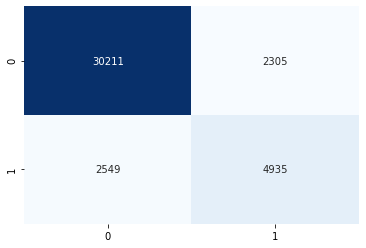

In [131]:
y_pred = bag_predictions_scaled[:,0]
#table["CatBoost_Scaled"] = bag_predictions_scaled[:,0]

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"Logloss for Cat {log_loss(y_test, bag_predictions_scaled[:,0])}")

accuracy of the model:  0.8793
Logloss for Cat 0.2541404405895241


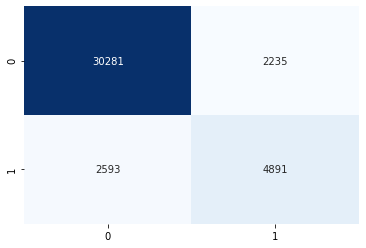

In [132]:
y_pred = bag_predictions_scaled[:,1]
#table["LightBoost_Scaled"] = bag_predictions_scaled[:,1]

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"Logloss for Cat {log_loss(y_test, bag_predictions_scaled[:,1])}")

In [137]:
data1 = pd.concat([df, test]).drop(["ARPU_SEGMENT", "ZONE1", "ZONE2"],axis=1)
data1.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,MISSING_COL,TOTAL_MISSING,TENURE_REG
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K,17000.0,32.0,18000.0,34.0,NaN,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0,0.0,3,No,28.202507
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K,4300.0,29.0,4427.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0.0,2,No,28.202507
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K,1500.0,3.0,1500.0,3.0,NaN,30.0,30.0,NaN,32,All-net 500F=2000F;5d,3.0,0.0,4,No,28.202507
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K,1500.0,3.0,2497.0,4.0,0.0,159.0,45.0,19.0,18,On net 200F=Unlimited _call24H,3.0,0.0,2,No,28.202507
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K,NaN,NaN,498.0,3.0,1.0,1.0,3.0,NaN,50,NaN,NaN,0.0,7,No,28.202507


In [138]:
data1["INACTIVE"] = inactive
#data1['TENURE_REG'] = data1.groupby(by=["TENURE"])[['REGULARITY']].transform(lambda x: np.mean(x))
data1['REGION'] = data1['REGION'].map(data1['REGION'].value_counts())

In [139]:
for i in ["TENURE", "TOP_PACK","INACTIVE","TOTAL_MISSING"]:    
    data1[i] = data1[i].astype("category").cat.codes

In [74]:
data1.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,MISSING_COL,TOTAL_MISSING,TENURE_REG,INACTIVE
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,27782.0,7,17000.0,32.0,18000.0,34.0,NaN,97.0,355.0,6.0,62,16,35.0,0.0,3,0,28.202507,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,7,4300.0,29.0,4427.0,37.0,1764.0,8.0,3.0,0.0,40,26,22.0,0.0,2,0,28.202507,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,12869.0,7,1500.0,3.0,1500.0,3.0,NaN,30.0,30.0,NaN,32,16,3.0,0.0,4,0,28.202507,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,8294.0,7,1500.0,3.0,2497.0,4.0,0.0,159.0,45.0,19.0,18,85,3.0,0.0,2,0,28.202507,1
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,8294.0,7,NaN,NaN,498.0,3.0,1.0,1.0,3.0,NaN,50,0,NaN,0.0,7,0,28.202507,0


In [140]:
x = data1[data1["CHURN"].notnull()].drop(["CHURN", "user_id"], axis=1)
Y = data1[data1["CHURN"].notnull()].CHURN

H = data1[data1["CHURN"].isnull()].drop(["CHURN", "user_id"],axis=1)

In [141]:
from sklearn.model_selection import train_test_split, KFold


_X_train, _X_test, _y_train, _y_test = train_test_split(x,Y, stratify=Y, random_state=42, test_size=.1)

In [ ]:
bags = 15
seed = 0
bag_predictions = np.zeros((_X_test.shape[0],2))
bag_test = np.zeros((H.shape[0], 2))

for i in range(bags):
    print(f"Iteration Number {i+1}")
    cat  = CatBoostClassifier(n_estimators=5000, eval_metric='Logloss', learning_rate=0.1, use_best_model=True, random_state=seed + i*42 )
    cat.fit(_X_train,_y_train,eval_set=[(_X_train,_y_train),(_X_test, _y_test)], early_stopping_rounds=100, verbose=False)
    predictions = cat.predict_proba(_X_test)[:,1]
    bag_predictions[:,0]+= predictions
    bag_test[:,0]+= cat.predict_proba(H)[:,1]
    print(f"Logloss for Cat {round(log_loss(_y_test, cat.predict_proba(_X_test)[:,1]), 6)}")
    
    reg  = LGBMClassifier(learning_rate=0.1, n_estimators=5000, n_jobs=-1, random_state=seed + i*42)
    reg.fit(_X_train,_y_train, eval_metric='logloss', eval_set=[(_X_train,_y_train),(_X_test, _y_test)], early_stopping_rounds=100, verbose=False)
    
    predictions = reg.predict_proba(_X_test)[:,1]
    bag_predictions[:,1]+= predictions
    bag_test[:,1]+= reg.predict_proba(H)[:,1]
    print(f"Logloss for light {round(log_loss(_y_test, reg.predict_proba(_X_test)[:,1]), 6)}")
    
    print()
    print()
bag_predictions/= bags
bag_test/= bags
print(log_loss(_y_test, bag_predictions[:,0]))
print(log_loss(_y_test, bag_predictions[:,1]))

Iteration Number 1
Logloss for Cat 0.253415
Logloss for light 0.253937


Iteration Number 2
Logloss for Cat 0.253567
Logloss for light 0.25391


Iteration Number 3
Logloss for Cat 0.253489
Logloss for light 0.25425


Iteration Number 4
Logloss for Cat 0.253533
Logloss for light 0.253811


Iteration Number 5
Logloss for Cat 0.253518
Logloss for light 0.253954


Iteration Number 6
Logloss for Cat 0.253322
Logloss for light 0.254128


Iteration Number 7
Logloss for Cat 0.25355
Logloss for light 0.254116


Iteration Number 8
Logloss for Cat 0.253435
Logloss for light 0.253921


Iteration Number 9
Logloss for Cat 0.25357
Logloss for light 0.254047


Iteration Number 11
Logloss for Cat 0.253528
Logloss for light 0.254078


Iteration Number 12
Logloss for Cat 0.253448
Logloss for light 0.253948


Iteration Number 13
Logloss for Cat 0.253447
Logloss for light 0.253983


Iteration Number 14
Logloss for Cat 0.253439
Logloss for light 0.254023


Iteration Number 15
Logloss for Cat 0.253558
Loglos

In [143]:
log_loss(_y_test, bag_predictions[:,0]*.5 + bag_predictions[:,1]*.5)

0.2534046392825634

accuracy of the model:  0.87885
Logloss for Cat 0.2529539978601005


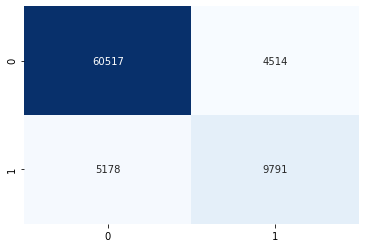

In [86]:
# Predicting the Test set results
y_pred = bag_predictions[:,0]
#table["CatBoost"] = bag_predictions[:,0]
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"Logloss for Cat {log_loss(y_test, bag_predictions[:,0])}")

accuracy of the model:  0.8786
Logloss for Cat 0.2534053917477468


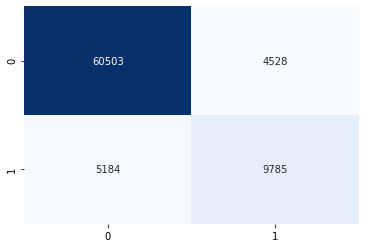

In [87]:
y_pred = bag_predictions[:,1]
#table["LightBoost"] = bag_predictions[:,1]

import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)
print(f"Logloss for Cat {log_loss(y_test, bag_predictions[:,1])}")

In [152]:
submission["CHURN"] = (bag_test_scaled[:,0]*.8 + bag_test_scaled[:,1]*.2)*.4 + (bag_test[:,0]*.8 + bag_test[:,1]*.2)*.6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
submission.to_csv("weighted_bags_and_scaled.csv", index=False)